---
---
<center> <font color=#227B6B size=8 face="black body"> Data Mining: Classification Problem  </font> <center> 
    
---
---



> <font color=#54685F size=5 face="black body"> PUC-Rio - B.I. Master - Turma 2020.2 </font>
> #### *Marcos Alonso Guimarães*
> [My LinkedIn](https://www.linkedin.com/in/marcosalonso16/) 
<br>
> [My Github](https://github.com/alonsoguimaraesmarcos) 



<center> <font color=#54685F size=5 face="black body"> Will the horse survive? </font>  <center>

![image.png]( 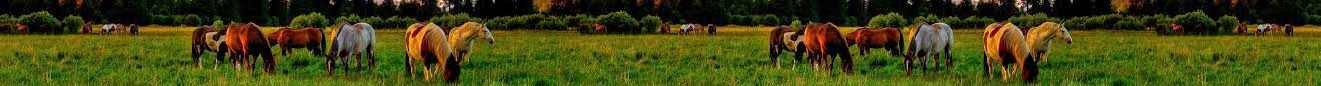)

---

<center> <font color='black' size=5 face="black body"> Overview and Script's Description  </font> <center> 


In this database, there are 27 (twenty seven) numerical and categorical features related to horse health and medical conditions. The objective of this work is to perform data-mining analysis into a typical kind of classification problem. 

For that, we've to deal with several kind of problems of real world, such as: a lot of NA's values, many features with no deep knowledge and how strong these variable are to horse's surviving prediction...

Then, I did this script to understand more about the dataset (data analysis), cleaning as much as possible the dataset and apply different kind of data-mining techniques to model and try to predict (or classify) if a horse may survive or not, based on its health conditions.

So, the main question is: **will the horse survive?**

---

 <font color = '#125031' size = 6 face = "black body"> 1. Installing required packages </font>


In [161]:
#!pip install missingno
#pip install wordcloud -q
#!pip install pandas_profiling

#### 1.1 Loading libraries

In [162]:
import pandas as pd #working with dataframes
import numpy as np #for math functions to arrays and matrices
import matplotlib # used for plots
import matplotlib.pyplot as plt
import missingno as msno # for checking missing values
import seaborn as sns # to plot...
import re #used to remove numbers and lower the words
import string # used for remove punctuation
from collections import Counter # counts words
import os # get current directory
#import pandas as pd, numpy as np, matplotlib, matplotlib.pyplot as plt,missingno as msno, seaborn as sns
import pandas_profiling as pd_pf

Checking current directory and csv files...

In [163]:
os.getcwd()

'C:\\Mestrado\\Data Mining\\Trabalho'

In [164]:
os.listdir("Material")
#os.listdir("Material")[2]

['datadict.pdf',
 'horse.csv',
 'horseTest.csv',
 'Template Relatório.pdf',
 'Trabalho.pdf']

 <font color = '#125031' size = 6 face = "black body"> 2. Loading Database </font>

#### 2.1 Loading database named 'horse' and showing first five rows.

In [165]:
data_training = pd.read_csv('Material/horse.csv', engine = 'python', encoding = 'utf-8', sep = ',') # reading and loading 
data_training.head() # first five rows

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0      no  adult           530101         38.5   66.0              28.0   
1     yes  adult           534817         39.2   88.0              20.0   
2      no  adult           530334         38.3   40.0              24.0   
3     yes  young          5290409         39.1  164.0              84.0   
4      no  adult           530255         37.3  104.0              35.0   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                cool          reduced             NaN            more_3_sec   
1                 NaN              NaN   pale_cyanotic            less_3_sec   
2              normal           normal       pale_pink            less_3_sec   
3                cold           normal   dark_cyanotic            more_3_sec   
4                 NaN              NaN   dark_cyanotic            more_3_sec   

   ... packed_cell_volume total_protein abdomo_appearance abdomo_protein  \
0  ...               45.0           8.4               NaN            NaN   
1  ...               50.0          85.0            cloudy            2.0   
2  ...               33.0           6.7               NaN            NaN   
3  ...               48.0           7.2     serosanguious            5.3   
4  ...               74.0           7.4               NaN            NaN   

      outcome  surgical_lesion lesion_1 lesion_2  lesion_3  cp_data  
0        died               no    11300        0         0       no  
1  euthanized               no     2208        0         0       no  
2       lived               no        0        0         0      yes  
3        died              yes     2208        0         0      yes  
4        died               no     4300        0         0       no  

[5 rows x 28 columns]

In [166]:
data_training.tail()# lastt five rows

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
294     yes  adult           533886          NaN  120.0              70.0   
295      no  adult           527702         37.2   72.0              24.0   
296     yes  adult           529386         37.5   72.0              30.0   
297     yes  adult           530612         36.5  100.0              24.0   
298     yes  adult           534618         37.2   40.0              20.0   

    temp_of_extremities peripheral_pulse mucous_membrane  \
294                cold              NaN   pale_cyanotic   
295                cool        increased   pale_cyanotic   
296                cold          reduced   pale_cyanotic   
297                cool          reduced       pale_pink   
298                 NaN              NaN             NaN   

    capillary_refill_time  ... packed_cell_volume total_protein  \
294            more_3_sec  ...               55.0          65.0   
295            more_3_sec  ...               44.0           NaN   
296            less_3_sec  ...               60.0           6.8   
297            less_3_sec  ...               50.0           6.0   
298                   NaN  ...               36.0          62.0   

    abdomo_appearance abdomo_protein     outcome  surgical_lesion lesion_1  \
294               NaN            NaN  euthanized               no     3205   
295     serosanguious            3.3  euthanized              yes     2208   
296               NaN            NaN        died              yes     3205   
297     serosanguious            3.4       lived              yes     2208   
298             clear            1.0  euthanized               no     6112   

    lesion_2  lesion_3  cp_data  
294        0         0       no  
295        0         0      yes  
296        0         0       no  
297        0         0      yes  
298        0         0       no  

[5 rows x 28 columns]

In [167]:
data_training.outcome.value_counts()

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

In [168]:
#data = pd.read_table ('Material/horse.csv', engine = 'python', encoding = 'windows-1252', sep = ',') # reading and loading 
#data.head() # first five rows
# if you have any problem reading the file (like "expected x fields in line y, saw w", try to rename and download it again.

Checking length...

In [169]:
len(data_training)

299

#### 2.2 Loading database named 'horseTest' and showing first five rows.

In [170]:
data_test = pd.read_csv('Material/horseTest.csv', engine = 'python', encoding = 'utf-8', sep = ',') # reading and loading
data_test.head() # first five rows

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0      no  adult                1         37.3  104.0              35.0   
1      no  adult                2         39.1   72.0              52.0   
2     yes  adult                3         37.2   42.0              12.0   
3      no  young                4         38.0   92.0              28.0   
4     yes  adult                5         37.6   64.0              21.0   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                 NaN              NaN   dark_cyanotic            more_3_sec   
1                warm              NaN     bright_pink            less_3_sec   
2                warm           normal     normal_pink            less_3_sec   
3              normal           normal     bright_pink            less_3_sec   
4              normal           normal     bright_pink            less_3_sec   

   ... packed_cell_volume total_protein abdomo_appearance abdomo_protein  \
0  ...               74.0           7.4               NaN            NaN   
1  ...               50.0           7.8               NaN            NaN   
2  ...                NaN           7.0               NaN            NaN   
3  ...               37.0           6.1             clear            NaN   
4  ...               40.0           7.0             clear            NaN   

  outcome  surgical_lesion lesion_1 lesion_2  lesion_3  cp_data  
0    died               no     4300        0         0       no  
1   lived              yes     2111        0         0       no  
2   lived               no     4124        0         0       no  
3    died               no        0        0         0      yes  
4   lived              yes     4205        0         0      yes  

[5 rows x 28 columns]

In [171]:
data_test.tail()

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
84     yes  adult               85          NaN    NaN               NaN   
85      no  adult               86         38.6   45.0              16.0   
86     yes  adult               87         38.9   80.0              44.0   
87     yes  adult               88         37.0   66.0              20.0   
88     yes  adult               89         36.5  100.0              24.0   

   temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
84                 NaN              NaN             NaN                   NaN   
85                warm           normal     bright_pink            less_3_sec   
86                cool          reduced       pale_pink            less_3_sec   
87              normal          reduced     bright_pink            less_3_sec   
88                cool          reduced       pale_pink            less_3_sec   

    ... packed_cell_volume total_protein abdomo_appearance abdomo_protein  \
84  ...                NaN           NaN               NaN            NaN   
85  ...               43.0          58.0               NaN            NaN   
86  ...               54.0           6.5     serosanguious            NaN   
87  ...               35.0           6.9            cloudy            NaN   
88  ...               50.0           6.0     serosanguious            3.4   

   outcome  surgical_lesion lesion_1 lesion_2  lesion_3  cp_data  
84   lived              yes     2124        0         0       no  
85   lived               no        0        0         0       no  
86    died              yes     7111        0         0       no  
87    died              yes    31110        0         0       no  
88   lived              yes     2208        0         0      yes  

[5 rows x 28 columns]

Checking length...

In [172]:
len(data_test)

89

As we have two files yet: one for training the model and the other one for testing, we could concat these two databases to preprocess. After that, we must extract the last 89 rows for testing. Also, it's important to understand that sharing the database to train and test involves a range of techniques. One the most famous is stratified sampling.

#### 2.3 Merge two files into one.

In [173]:
files_horse = [data_training,data_test]
data = pd.concat(files_horse,ignore_index=True) # pd.concat preserve index's number...ignore_index=True allows to create new index
data.head()
# we could use append() function too

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0      no  adult           530101         38.5   66.0              28.0   
1     yes  adult           534817         39.2   88.0              20.0   
2      no  adult           530334         38.3   40.0              24.0   
3     yes  young          5290409         39.1  164.0              84.0   
4      no  adult           530255         37.3  104.0              35.0   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                cool          reduced             NaN            more_3_sec   
1                 NaN              NaN   pale_cyanotic            less_3_sec   
2              normal           normal       pale_pink            less_3_sec   
3                cold           normal   dark_cyanotic            more_3_sec   
4                 NaN              NaN   dark_cyanotic            more_3_sec   

   ... packed_cell_volume total_protein abdomo_appearance abdomo_protein  \
0  ...               45.0           8.4               NaN            NaN   
1  ...               50.0          85.0            cloudy            2.0   
2  ...               33.0           6.7               NaN            NaN   
3  ...               48.0           7.2     serosanguious            5.3   
4  ...               74.0           7.4               NaN            NaN   

      outcome  surgical_lesion lesion_1 lesion_2  lesion_3  cp_data  
0        died               no    11300        0         0       no  
1  euthanized               no     2208        0         0       no  
2       lived               no        0        0         0      yes  
3        died              yes     2208        0         0      yes  
4        died               no     4300        0         0       no  

[5 rows x 28 columns]

Let's see...

In [174]:
data.tail() #checking last five rows...

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
383     yes  adult               85          NaN    NaN               NaN   
384      no  adult               86         38.6   45.0              16.0   
385     yes  adult               87         38.9   80.0              44.0   
386     yes  adult               88         37.0   66.0              20.0   
387     yes  adult               89         36.5  100.0              24.0   

    temp_of_extremities peripheral_pulse mucous_membrane  \
383                 NaN              NaN             NaN   
384                warm           normal     bright_pink   
385                cool          reduced       pale_pink   
386              normal          reduced     bright_pink   
387                cool          reduced       pale_pink   

    capillary_refill_time  ... packed_cell_volume total_protein  \
383                   NaN  ...                NaN           NaN   
384            less_3_sec  ...               43.0          58.0   
385            less_3_sec  ...               54.0           6.5   
386            less_3_sec  ...               35.0           6.9   
387            less_3_sec  ...               50.0           6.0   

    abdomo_appearance abdomo_protein outcome  surgical_lesion lesion_1  \
383               NaN            NaN   lived              yes     2124   
384               NaN            NaN   lived               no        0   
385     serosanguious            NaN    died              yes     7111   
386            cloudy            NaN    died              yes    31110   
387     serosanguious            3.4   lived              yes     2208   

    lesion_2  lesion_3  cp_data  
383        0         0       no  
384        0         0       no  
385        0         0       no  
386        0         0       no  
387        0         0      yes  

[5 rows x 28 columns]

Checking length...

In [175]:
len(data)

388

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                388 non-null    object 
 1   age                    388 non-null    object 
 2   hospital_number        388 non-null    int64  
 3   rectal_temp            312 non-null    float64
 4   pulse                  359 non-null    float64
 5   respiratory_rate       314 non-null    float64
 6   temp_of_extremities    319 non-null    object 
 7   peripheral_pulse       300 non-null    object 
 8   mucous_membrane        331 non-null    object 
 9   capillary_refill_time  352 non-null    object 
 10  pain                   321 non-null    object 
 11  peristalsis            334 non-null    object 
 12  abdominal_distention   320 non-null    object 
 13  nasogastric_tube       261 non-null    object 
 14  nasogastric_reflux     254 non-null    object 
 15  nasoga

The main objective of merging those two files (train and test) is to reproduce the reality. But it's important to understand that for preprocessing on a data mining problem, we need to separate the database into train and test on beginning. This is necessary to avoid information leak for our test file.

<br>

We know to infer that we have knowledge about train database, but we "don't" know our test database! \
Let's undo the concat process!

In [177]:
#X = data.loc[:,data.columns != "outcome"] #input
#y = data.outcome
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=89/388, shuffle=False, random_state=1) # we could use len(data) and len(data_test) rather than type numbers... shuffle = False avoid split ramdomly and get the same original files
from sklearn.model_selection import train_test_split 
train, test = train_test_split(data, test_size=89/388, shuffle=False, random_state=1) # we could use len(data) and len(data_test) rather than type numbers... shuffle = False avoid split ramdomly and get the same original files

In [178]:
#from sklearn.model_selection import train_test_split 
#X = data.loc[:,data.columns != "outcome"] 
#y = data.outcome
#train, test, y_train, y_test = train_test_split(X, y, test_size=89/388, shuffle=False, random_state=1)

In [179]:
#y_train.index.values

In [180]:
train

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0        no  adult           530101         38.5   66.0              28.0   
1       yes  adult           534817         39.2   88.0              20.0   
2        no  adult           530334         38.3   40.0              24.0   
3       yes  young          5290409         39.1  164.0              84.0   
4        no  adult           530255         37.3  104.0              35.0   
..      ...    ...              ...          ...    ...               ...   
294     yes  adult           533886          NaN  120.0              70.0   
295      no  adult           527702         37.2   72.0              24.0   
296     yes  adult           529386         37.5   72.0              30.0   
297     yes  adult           530612         36.5  100.0              24.0   
298     yes  adult           534618         37.2   40.0              20.0   

    temp_of_extremities peripheral_pulse mucous_membrane  \
0                  cool          reduced             NaN   
1                   NaN              NaN   pale_cyanotic   
2                normal           normal       pale_pink   
3                  cold           normal   dark_cyanotic   
4                   NaN              NaN   dark_cyanotic   
..                  ...              ...             ...   
294                cold              NaN   pale_cyanotic   
295                cool        increased   pale_cyanotic   
296                cold          reduced   pale_cyanotic   
297                cool          reduced       pale_pink   
298                 NaN              NaN             NaN   

    capillary_refill_time  ... packed_cell_volume total_protein  \
0              more_3_sec  ...               45.0           8.4   
1              less_3_sec  ...               50.0          85.0   
2              less_3_sec  ...               33.0           6.7   
3              more_3_sec  ...               48.0           7.2   
4              more_3_sec  ...               74.0           7.4   
..                    ...  ...                ...           ...   
294            more_3_sec  ...               55.0          65.0   
295            more_3_sec  ...               44.0           NaN   
296            less_3_sec  ...               60.0           6.8   
297            less_3_sec  ...               50.0           6.0   
298                   NaN  ...               36.0          62.0   

    abdomo_appearance abdomo_protein     outcome  surgical_lesion lesion_1  \
0                 NaN            NaN        died               no    11300   
1              cloudy            2.0  euthanized               no     2208   
2                 NaN            NaN       lived               no        0   
3       serosanguious            5.3        died              yes     2208   
4                 NaN            NaN        died               no     4300   
..                ...            ...         ...              ...      ...   
294               NaN            NaN  euthanized               no     3205   
295     serosanguious            3.3  euthanized              yes     2208   
296               NaN            NaN        died              yes     3205   
297     serosanguious            3.4       lived              yes     2208   
298             clear            1.0  euthanized               no     6112   

    lesion_2  lesion_3  cp_data  
0          0         0       no  
1          0         0       no  
2          0         0      yes  
3          0         0      yes  
4          0         0       no  
..       ...       ...      ...  
294        0         0       no  
295        0         0      yes  
296        0         0       no  
297        0         0      yes  
298        0         0       no  

[299 rows x 28 columns]

In [181]:
test

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
299      no  adult                1         37.3  104.0              35.0   
300      no  adult                2         39.1   72.0              52.0   
301     yes  adult                3         37.2   42.0              12.0   
302      no  young                4         38.0   92.0              28.0   
303     yes  adult                5         37.6   64.0              21.0   
..      ...    ...              ...          ...    ...               ...   
383     yes  adult               85          NaN    NaN               NaN   
384      no  adult               86         38.6   45.0              16.0   
385     yes  adult               87         38.9   80.0              44.0   
386     yes  adult               88         37.0   66.0              20.0   
387     yes  adult               89         36.5  100.0              24.0   

    temp_of_extremities peripheral_pulse mucous_membrane  \
299                 NaN              NaN   dark_cyanotic   
300                warm              NaN     bright_pink   
301                warm           normal     normal_pink   
302              normal           normal     bright_pink   
303              normal           normal     bright_pink   
..                  ...              ...             ...   
383                 NaN              NaN             NaN   
384                warm           normal     bright_pink   
385                cool          reduced       pale_pink   
386              normal          reduced     bright_pink   
387                cool          reduced       pale_pink   

    capillary_refill_time  ... packed_cell_volume total_protein  \
299            more_3_sec  ...               74.0           7.4   
300            less_3_sec  ...               50.0           7.8   
301            less_3_sec  ...                NaN           7.0   
302            less_3_sec  ...               37.0           6.1   
303            less_3_sec  ...               40.0           7.0   
..                    ...  ...                ...           ...   
383                   NaN  ...                NaN           NaN   
384            less_3_sec  ...               43.0          58.0   
385            less_3_sec  ...               54.0           6.5   
386            less_3_sec  ...               35.0           6.9   
387            less_3_sec  ...               50.0           6.0   

    abdomo_appearance abdomo_protein outcome  surgical_lesion lesion_1  \
299               NaN            NaN    died               no     4300   
300               NaN            NaN   lived              yes     2111   
301               NaN            NaN   lived               no     4124   
302             clear            NaN    died               no        0   
303             clear            NaN   lived              yes     4205   
..                ...            ...     ...              ...      ...   
383               NaN            NaN   lived              yes     2124   
384               NaN            NaN   lived               no        0   
385     serosanguious            NaN    died              yes     7111   
386            cloudy            NaN    died              yes    31110   
387     serosanguious            3.4   lived              yes     2208   

    lesion_2  lesion_3  cp_data  
299        0         0       no  
300        0         0       no  
301        0         0       no  
302        0         0      yes  
303        0         0      yes  
..       ...       ...      ...  
383        0         0       no  
384        0         0       no  
385        0         0       no  
386        0         0       no  
387        0         0      yes  

[89 rows x 28 columns]

 <font color = '#125031' size = 6 face = "black body"> 3. Exploratory Analysis  </font>


#### 3.1 Checking Database

In [182]:
train.head() # first five rows


surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0      no  adult           530101         38.5   66.0              28.0   
1     yes  adult           534817         39.2   88.0              20.0   
2      no  adult           530334         38.3   40.0              24.0   
3     yes  young          5290409         39.1  164.0              84.0   
4      no  adult           530255         37.3  104.0              35.0   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                cool          reduced             NaN            more_3_sec   
1                 NaN              NaN   pale_cyanotic            less_3_sec   
2              normal           normal       pale_pink            less_3_sec   
3                cold           normal   dark_cyanotic            more_3_sec   
4                 NaN              NaN   dark_cyanotic            more_3_sec   

   ... packed_cell_volume total_protein abdomo_appearance abdomo_protein  \
0  ...               45.0           8.4               NaN            NaN   
1  ...               50.0          85.0            cloudy            2.0   
2  ...               33.0           6.7               NaN            NaN   
3  ...               48.0           7.2     serosanguious            5.3   
4  ...               74.0           7.4               NaN            NaN   

      outcome  surgical_lesion lesion_1 lesion_2  lesion_3  cp_data  
0        died               no    11300        0         0       no  
1  euthanized               no     2208        0         0       no  
2       lived               no        0        0         0      yes  
3        died              yes     2208        0         0      yes  
4        died               no     4300        0         0       no  

[5 rows x 28 columns]

In [183]:
train.shape

(299, 28)

In [184]:
train.iloc[1:,0] # location/position

1      yes
2       no
3      yes
4       no
5       no
      ... 
294    yes
295     no
296    yes
297    yes
298    yes
Name: surgery, Length: 298, dtype: object

In [185]:
train.loc[0,'age'] # location/position

'adult'

After displaying the name of columns, it's possible to see that the columns 'Regiao ', 'subsidiaria ' and 'area ' have blank spaces. This could be a problem when trying to call these attributes later.

In [186]:
train.columns # - number and name of columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

#### 3.2 Type and Profile of Database

Let's check the types of attributes:

 - **object** - normally string or set of strings;
 - **int64** e **float64** are numerical.

In [187]:
train.dtypes
# or data.info() as above 

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

One of the most interesting packages in Python is pandas_profiling. It summarizes dataset in a few set of lines and reports.

In [188]:
pd_pf.ProfileReport(train) #let's do a Profile Report of our data...

C:\Users\marco\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Also, it's possible to produce discrete statistics about numerical attributes

In [189]:
train.describe()
#data.describe().iloc[:,2]

hospital_number  rectal_temp       pulse  respiratory_rate  \
count     2.990000e+02   239.000000  275.000000        241.000000   
mean      1.087733e+06    38.168619   72.000000         30.460581   
std       1.532032e+06     0.733744   28.646219         17.666102   
min       5.184760e+05    35.400000   30.000000          8.000000   
25%       5.289040e+05    37.800000   48.000000         18.000000   
50%       5.303010e+05    38.200000   64.000000         25.000000   
75%       5.347360e+05    38.500000   88.000000         36.000000   
max       5.305629e+06    40.800000  184.000000         96.000000   

       nasogastric_reflux_ph  packed_cell_volume  total_protein  \
count              53.000000          270.000000     266.000000   
mean                4.707547           46.307407      24.274436   
std                 1.982311           10.436743      27.364194   
min                 1.000000           23.000000       3.300000   
25%                 3.000000           38.000000       6.500000   
50%                 5.000000           45.000000       7.500000   
75%                 6.500000           52.000000      56.750000   
max                 7.500000           75.000000      89.000000   

       abdomo_protein      lesion_1     lesion_2     lesion_3  
count      101.000000    299.000000   299.000000   299.000000  
mean         3.039604   3659.709030    90.528428     7.387960  
std          1.967947   5408.472421   650.637139   127.749768  
min          0.100000      0.000000     0.000000     0.000000  
25%          2.000000   2111.500000     0.000000     0.000000  
50%          2.300000   2322.000000     0.000000     0.000000  
75%          3.900000   3209.000000     0.000000     0.000000  
max         10.100000  41110.000000  7111.000000  2209.000000

Interesting point: The most of horses had just one surgical lesion.

lesion_2 and lesion_3 defines that...

In [190]:
train.lesion_2.value_counts(dropna = False, normalize = True) # more than 97% of registers is zero

0       0.976589
3111    0.010033
6112    0.003344
7111    0.003344
1400    0.003344
3112    0.003344
Name: lesion_2, dtype: float64

In [191]:
train.lesion_3.value_counts(dropna = False, normalize = True) # more than 99% of registers is zero

0       0.996656
2209    0.003344
Name: lesion_3, dtype: float64

Just cheking shape of database.

In [192]:
#len(data) # number of rows
train.shape

(299, 28)

Creating a histogram plot, we can see the frequency split by ranges/classes of our variable. We could see, for example, that rectal_temp it's similar to a gaussian distribution. At the same time, we have a right skewed distribution on horses's pulse.

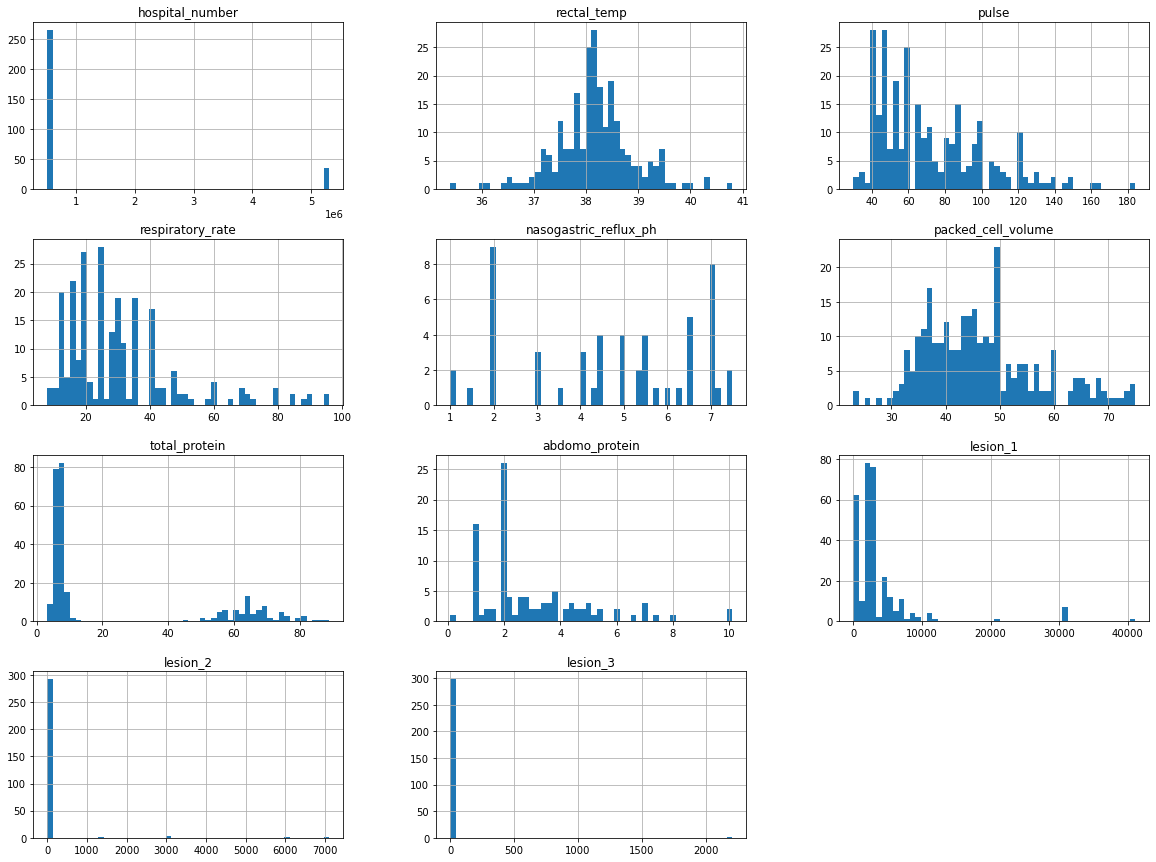

In [193]:
%matplotlib inline 
import matplotlib.pyplot as plt
train.hist(bins=50, figsize = (20,15))
plt.show()
#most simple way to create a graphic backend for matplotlib - it works only on Jupyter notebook

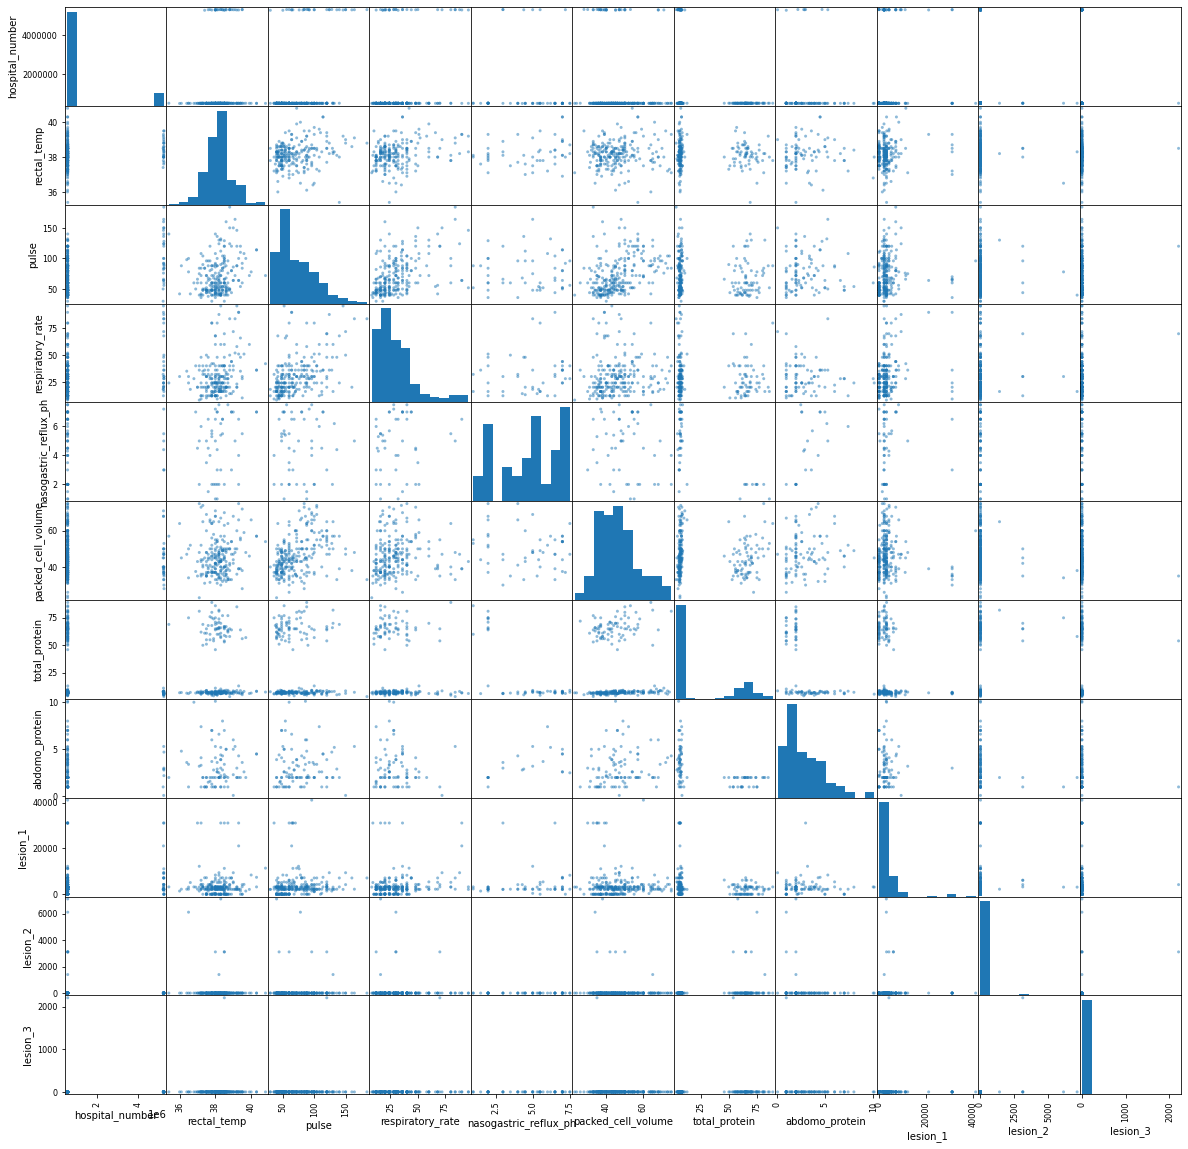

In [194]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(train, figsize = (20,20))
plt.show()

#### 3.2 Checking for missing values.

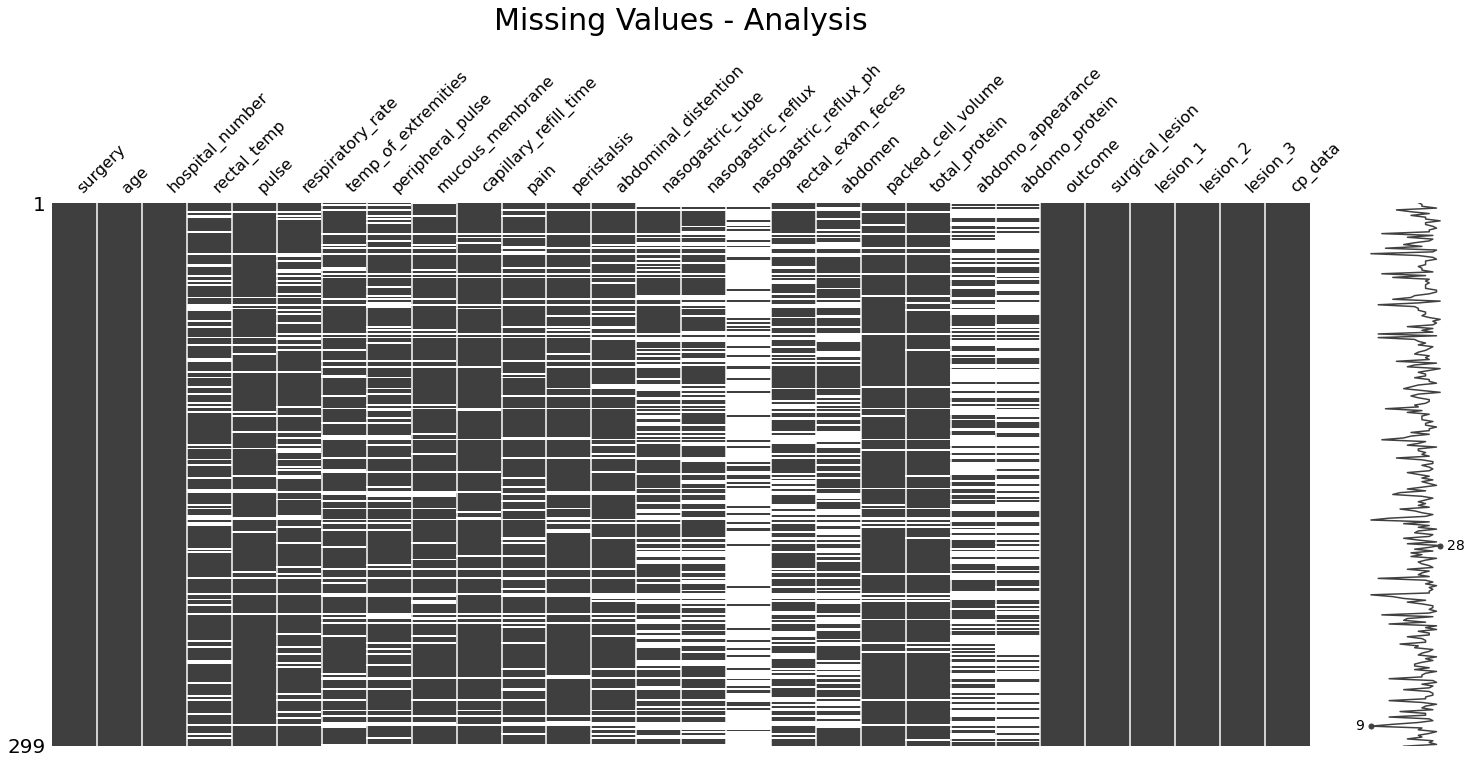

In [195]:
msno.matrix(train) #- matrix
plt.title('Missing Values - Analysis', size = 30, pad=30)
plt.show()

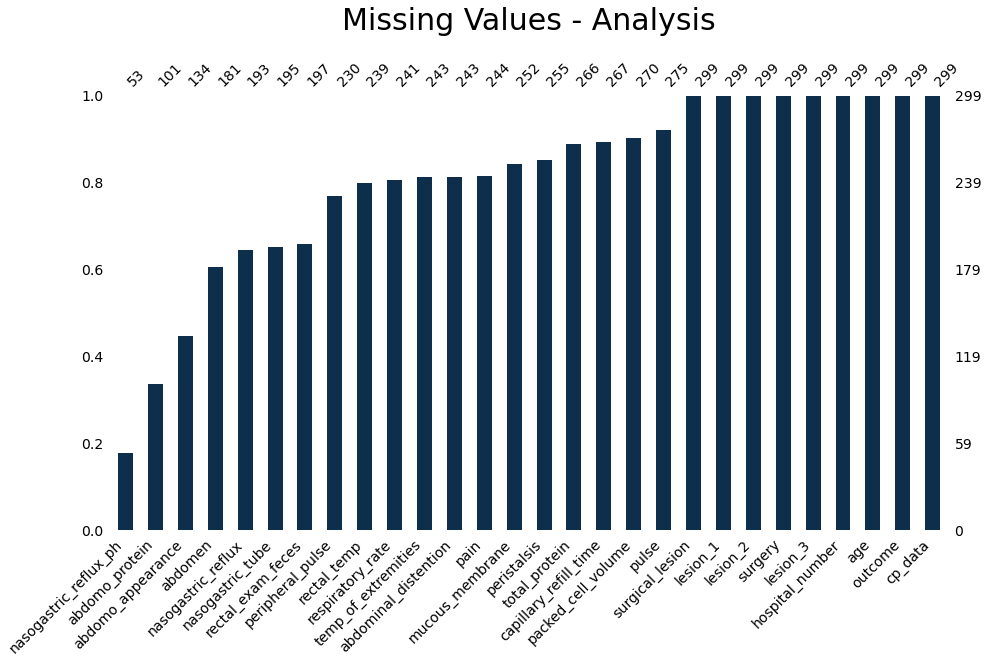

In [196]:
#msno.matrix(data) #- matrix
#msno.heatmap(data) #- heatmap
#msno.bar(data)# - bar plot
msno.bar(train, color="#0D2F4C", sort="ascending", figsize=(15,8), fontsize=14)
plt.title('Missing Values - Analysis', size = 30, pad=30)
plt.show() # - show plot/remove obs after running the plot

In [197]:
#X_train.isnull().any(axis=1) #rows
#X_train.isnull().any()#columns
null_columns = train.columns[train.isnull().any()] # Defining columns with missing values
null_columns

Index(['rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities',
       'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain',
       'peristalsis', 'abdominal_distention', 'nasogastric_tube',
       'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces',
       'abdomen', 'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein'],
      dtype='object')

In [198]:
train[null_columns].isnull().sum().sort_values() # Counting number of rows.

pulse                     24
packed_cell_volume        29
capillary_refill_time     32
total_protein             33
peristalsis               44
mucous_membrane           47
pain                      55
abdominal_distention      56
temp_of_extremities       56
respiratory_rate          58
rectal_temp               60
peripheral_pulse          69
rectal_exam_feces        102
nasogastric_tube         104
nasogastric_reflux       106
abdomen                  118
abdomo_appearance        165
abdomo_protein           198
nasogastric_reflux_ph    246
dtype: int64

Let's check one single column...

In [199]:
train[pd.isnull(train['pulse'])] # Display only row with missing value in pulse column

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
5        no  adult           528355          NaN    NaN               NaN   
28      yes  adult          5279442          NaN    NaN               NaN   
52       no  adult           529483          NaN    NaN               NaN   
56      yes  adult           528872          NaN    NaN               NaN   
58      yes  adult           528298          NaN    NaN              20.0   
74      yes  young          5292929          NaN    NaN               NaN   
78      yes  adult           530693          NaN    NaN               NaN   
83      yes  adult          5279822         38.0    NaN              24.0   
93       no  adult           530310          NaN    NaN               NaN   
115      no  adult           533723          NaN    NaN              40.0   
117      no  adult          5290482         39.5    NaN               NaN   
126     yes  adult           530384         38.7    NaN               NaN   
135     yes  adult           530693          NaN    NaN               NaN   
150     yes  adult           529399         39.3    NaN               NaN   
158      no  adult           528134          NaN    NaN              12.0   
159     yes  adult           527916          NaN    NaN               NaN   
173      no  adult           518476          NaN    NaN               NaN   
174     yes  adult           527929          NaN    NaN               NaN   
181     yes  adult          5279822         38.0    NaN              24.0   
203     yes  adult           529528         39.2    NaN              23.0   
206     yes  adult           530297          NaN    NaN               NaN   
215      no  adult           528977          NaN    NaN               NaN   
226     yes  young          5289419          NaN    NaN               NaN   
287     yes  adult           529428          NaN    NaN               NaN   

    temp_of_extremities peripheral_pulse mucous_membrane  \
5                  warm           normal       pale_pink   
28                  NaN              NaN             NaN   
52               normal           normal       pale_pink   
56                  NaN              NaN             NaN   
58                 cold          reduced       pale_pink   
74                  NaN              NaN             NaN   
78                 cool          reduced       pale_pink   
83                 cool          reduced   dark_cyanotic   
93                 cool          reduced     normal_pink   
115                cool           normal     normal_pink   
117                cool          reduced   pale_cyanotic   
126                cool           normal       pale_pink   
135                cool          reduced       pale_pink   
150                cold          reduced   dark_cyanotic   
158              normal           normal     bright_pink   
159                 NaN              NaN             NaN   
173                cool           absent   dark_cyanotic   
174                 NaN              NaN             NaN   
181                cool          reduced   dark_cyanotic   
203                cool           normal       pale_pink   
206                 NaN              NaN             NaN   
215                 NaN              NaN             NaN   
226                 NaN              NaN             NaN   
287                 NaN              NaN             NaN   

    capillary_refill_time  ... packed_cell_volume total_protein  \
5              less_3_sec  ...                NaN           NaN   
28                    NaN  ...                NaN           NaN   
52             less_3_sec  ...               43.0           7.7   
56                    NaN  ...               24.0           6.7   
58                    NaN  ...               53.0           5.9   
74                    NaN  ...               37.0           4.9   
78                      3  ...               46.0           5.9   
83             more_3_sec  ...           

It's possible to make a new DataFrame with missing values percentual.

In [200]:
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_data = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing}) # creating dictionary...
missing_value_data.sort_values('percent_missing', inplace=True)
missing_value_data

column_name  percent_missing
surgery                              surgery         0.000000
lesion_2                            lesion_2         0.000000
lesion_1                            lesion_1         0.000000
surgical_lesion              surgical_lesion         0.000000
outcome                              outcome         0.000000
lesion_3                            lesion_3         0.000000
cp_data                              cp_data         0.000000
age                                      age         0.000000
hospital_number              hospital_number         0.000000
pulse                                  pulse         8.026756
packed_cell_volume        packed_cell_volume         9.698997
capillary_refill_time  capillary_refill_time        10.702341
total_protein                  total_protein        11.036789
peristalsis                      peristalsis        14.715719
mucous_membrane              mucous_membrane        15.719064
pain                                    pain        18.394649
abdominal_distention    abdominal_distention        18.729097
temp_of_extremities      temp_of_extremities        18.729097
respiratory_rate            respiratory_rate        19.397993
rectal_temp                      rectal_temp        20.066890
peripheral_pulse            peripheral_pulse        23.076923
rectal_exam_feces          rectal_exam_feces        34.113712
nasogastric_tube            nasogastric_tube        34.782609
nasogastric_reflux        nasogastric_reflux        35.451505
abdomen                              abdomen        39.464883
abdomo_appearance          abdomo_appearance        55.183946
abdomo_protein                abdomo_protein        66.220736
nasogastric_reflux_ph  nasogastric_reflux_ph        82.274247

 <font color = '#125031' size = 6 face = "black body"> 4. Data Preprocessing </font>


In the table below, it can be summarized a "to do" list in data preprocessing:

| Data Cleaning | Data Transformation | Data Reduction |
| --- | --- | --- |
| Missing Values | Normalization | Dimensionality Reduction |
| Noisy Data (outliers, etc) | Attribute 'Creation' | Attribute Selection |
| - | Discretization | Data Aggregation|
| - | Hierarchy Transformation | - |

#### 4.1 Dealing with Outcome label - Balanced Data

First, we know our data label on this supervised learning is outcome. The horse lives, dies or receive an euthanasia process. For some of our models and thinking about performance, we could work with only two endings: 'lived' or 'died'.

In [201]:
outcome_list = pd.DataFrame()
#outcome_list['antes'] = data.outcome.value_counts(dropna = False)
outcome_list['antes'] = train.outcome.value_counts(dropna = False,normalize=True) 
outcome_list
#data.drop_duplicates(subset='outcome') #keep="last" mantain index - we could use this to verify

antes
lived       0.595318
died        0.257525
euthanized  0.147157

In [202]:
type(outcome_list)

pandas.core.frame.DataFrame

Notice that when we replace/transform 'died' and 'euthanized' into one ('died'), we gain in our model's robustness. These  two classes of output allows a balanced outcome results.

In [203]:
train

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0        no  adult           530101         38.5   66.0              28.0   
1       yes  adult           534817         39.2   88.0              20.0   
2        no  adult           530334         38.3   40.0              24.0   
3       yes  young          5290409         39.1  164.0              84.0   
4        no  adult           530255         37.3  104.0              35.0   
..      ...    ...              ...          ...    ...               ...   
294     yes  adult           533886          NaN  120.0              70.0   
295      no  adult           527702         37.2   72.0              24.0   
296     yes  adult           529386         37.5   72.0              30.0   
297     yes  adult           530612         36.5  100.0              24.0   
298     yes  adult           534618         37.2   40.0              20.0   

    temp_of_extremities peripheral_pulse mucous_membrane  \
0                  cool          reduced             NaN   
1                   NaN              NaN   pale_cyanotic   
2                normal           normal       pale_pink   
3                  cold           normal   dark_cyanotic   
4                   NaN              NaN   dark_cyanotic   
..                  ...              ...             ...   
294                cold              NaN   pale_cyanotic   
295                cool        increased   pale_cyanotic   
296                cold          reduced   pale_cyanotic   
297                cool          reduced       pale_pink   
298                 NaN              NaN             NaN   

    capillary_refill_time  ... packed_cell_volume total_protein  \
0              more_3_sec  ...               45.0           8.4   
1              less_3_sec  ...               50.0          85.0   
2              less_3_sec  ...               33.0           6.7   
3              more_3_sec  ...               48.0           7.2   
4              more_3_sec  ...               74.0           7.4   
..                    ...  ...                ...           ...   
294            more_3_sec  ...               55.0          65.0   
295            more_3_sec  ...               44.0           NaN   
296            less_3_sec  ...               60.0           6.8   
297            less_3_sec  ...               50.0           6.0   
298                   NaN  ...               36.0          62.0   

    abdomo_appearance abdomo_protein     outcome  surgical_lesion lesion_1  \
0                 NaN            NaN        died               no    11300   
1              cloudy            2.0  euthanized               no     2208   
2                 NaN            NaN       lived               no        0   
3       serosanguious            5.3        died              yes     2208   
4                 NaN            NaN        died               no     4300   
..                ...            ...         ...              ...      ...   
294               NaN            NaN  euthanized               no     3205   
295     serosanguious            3.3  euthanized              yes     2208   
296               NaN            NaN        died              yes     3205   
297     serosanguious            3.4       lived              yes     2208   
298             clear            1.0  euthanized               no     6112   

    lesion_2  lesion_3  cp_data  
0          0         0       no  
1          0         0       no  
2          0         0      yes  
3          0         0      yes  
4          0         0       no  
..       ...       ...      ...  
294        0         0       no  
295        0         0      yes  
296        0         0       no  
297        0         0      yes  
298        0         0       no  

[299 rows x 28 columns]

In [204]:
#train.loc[train["outcome"] == "euthanized", ["outcome"]] = "died"
train.loc[train.outcome == "euthanized", "outcome"] = "died"
#y_train.loc[y_train == "euthanized"] = "died"
#data.loc[data.outcome == "euthanized", "outcome"] = "died" # it's possible to do a 'for' with 'if' condition too...

C:\Users\marco\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [205]:
outcome_list['depois'] = train.outcome.value_counts(dropna = False, normalize=True)
outcome_list

antes    depois
lived       0.595318  0.595318
died        0.257525  0.404682
euthanized  0.147157       NaN

#### 4.2 Columns Analysis

After reading the dictionary of the dataset (or in a consultation meeting with a client/specialist), our first attribute with no significance in our context and on purpose of modelling, the column cp_data just confirm if there is pathology data present on that case. As we don't have those exams, this attribute has no meaning for us.
\
\
Then our second step is drop that column.

In [206]:
train = train.drop(columns = ['cp_data'])

In [207]:
train.shape

(299, 27)

At the same time, respiratory_rate, accord to dictionary, usefulness "is doubtful due to the great fluctuations". Also, as we have almost 20% of missing data, we decided to drop that column too.

<br>

Besides, lesion_2 and lesion_3 colums have few variance. So we could infer those informations is lower informative.

<br>
We have a lot of hospital numbers. This variance associated with few information to aggregate let me drop that attribute too.

In [208]:
train = train.drop(columns = ['hospital_number','respiratory_rate','lesion_2','lesion_3'])

In [209]:
train.shape

(299, 23)

#### 4.3 Dealing with Missing Values

It's important to say that all kind of more creative treatments of missing values we've to be more carefully! For example, if we want to input missing value cells with mode, median or average value, it has to be done only in training model. This is important to avoid data leakage, when we share information between test and training datasets.
<br>
<br>
For now and first of all, after analysing all columns, it has decided to drop all columns with content percentual lower than 70%.

In [210]:
missing_value_data.loc[percent_missing > 30]

column_name  percent_missing
rectal_exam_feces          rectal_exam_feces        34.113712
nasogastric_tube            nasogastric_tube        34.782609
nasogastric_reflux        nasogastric_reflux        35.451505
abdomen                              abdomen        39.464883
abdomo_appearance          abdomo_appearance        55.183946
abdomo_protein                abdomo_protein        66.220736
nasogastric_reflux_ph  nasogastric_reflux_ph        82.274247

In [211]:
filter_data = missing_value_data.loc[percent_missing > 30].index
train = train.drop(columns = filter_data)
train.head()

surgery    age  rectal_temp  pulse temp_of_extremities peripheral_pulse  \
0      no  adult         38.5   66.0                cool          reduced   
1     yes  adult         39.2   88.0                 NaN              NaN   
2      no  adult         38.3   40.0              normal           normal   
3     yes  young         39.1  164.0                cold           normal   
4      no  adult         37.3  104.0                 NaN              NaN   

  mucous_membrane capillary_refill_time          pain peristalsis  \
0             NaN            more_3_sec  extreme_pain      absent   
1   pale_cyanotic            less_3_sec     mild_pain      absent   
2       pale_pink            less_3_sec     mild_pain  hypomotile   
3   dark_cyanotic            more_3_sec     depressed      absent   
4   dark_cyanotic            more_3_sec           NaN         NaN   

  abdominal_distention  packed_cell_volume  total_protein outcome  \
0               severe                45.0            8.4    died   
1               slight                50.0           85.0    died   
2                 none                33.0            6.7   lived   
3               severe                48.0            7.2    died   
4                  NaN                74.0            7.4    died   

  surgical_lesion  lesion_1  
0              no     11300  
1              no      2208  
2              no         0  
3             yes      2208  
4              no      4300

In [212]:
train.shape

(299, 16)

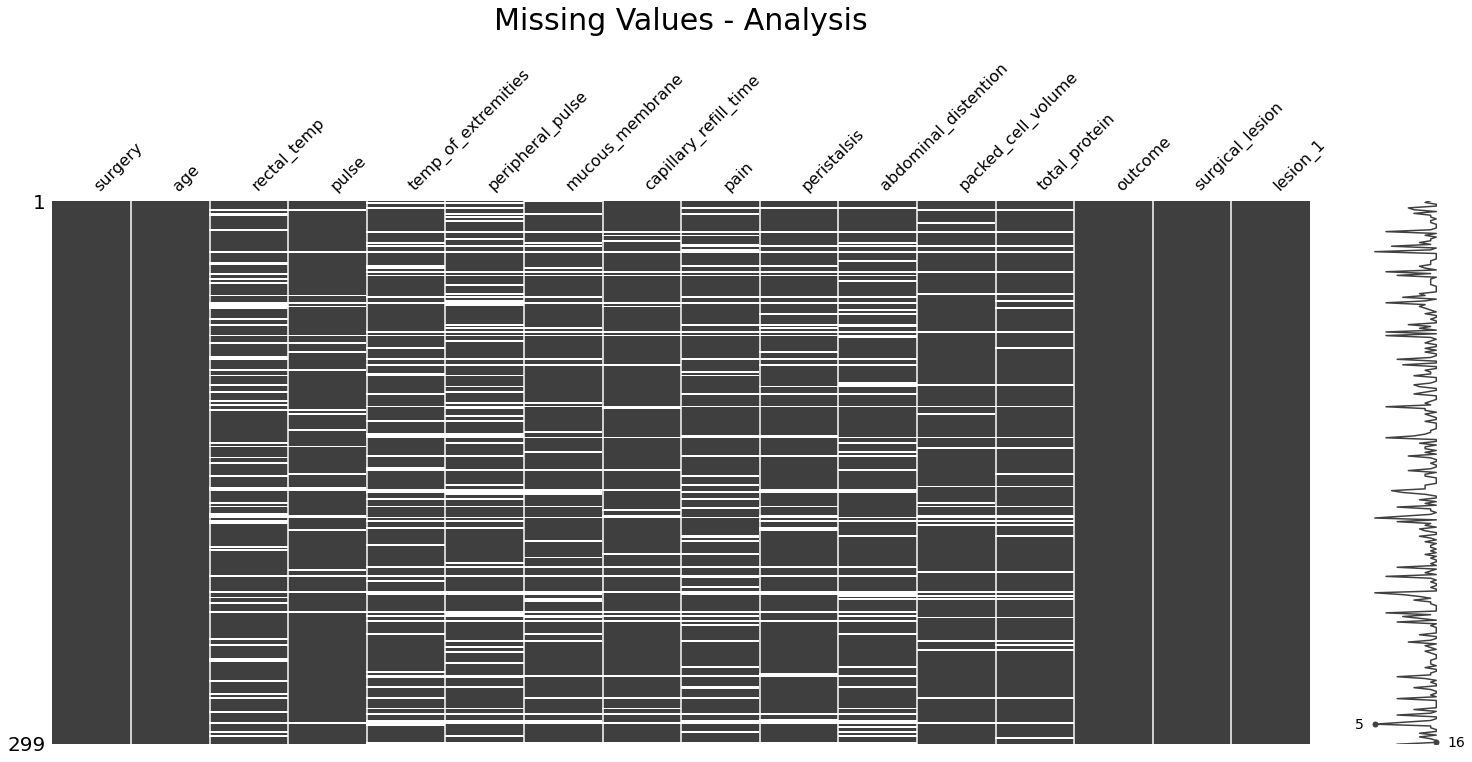

In [213]:
msno.matrix(train) #- matrix
plt.title('Missing Values - Analysis', size = 30, pad=30)
plt.show()

We still have a lot of missing data. We could try a horizontal overview of our dataset. Try to remove rows that contains a lot of missing attributes.

In [214]:
train = train.dropna(thresh=10) #eleven before...changed to 10
train.shape

(274, 16)

In [215]:
train

surgery    age  rectal_temp  pulse temp_of_extremities peripheral_pulse  \
0        no  adult         38.5   66.0                cool          reduced   
1       yes  adult         39.2   88.0                 NaN              NaN   
2        no  adult         38.3   40.0              normal           normal   
3       yes  young         39.1  164.0                cold           normal   
4        no  adult         37.3  104.0                 NaN              NaN   
..      ...    ...          ...    ...                 ...              ...   
293      no  adult         38.5   40.0              normal           normal   
294     yes  adult          NaN  120.0                cold              NaN   
295      no  adult         37.2   72.0                cool        increased   
296     yes  adult         37.5   72.0                cold          reduced   
297     yes  adult         36.5  100.0                cool          reduced   

    mucous_membrane capillary_refill_time          pain  peristalsis  \
0               NaN            more_3_sec  extreme_pain       absent   
1     pale_cyanotic            less_3_sec     mild_pain       absent   
2         pale_pink            less_3_sec     mild_pain   hypomotile   
3     dark_cyanotic            more_3_sec     depressed       absent   
4     dark_cyanotic            more_3_sec           NaN          NaN   
..              ...                   ...           ...          ...   
293     normal_pink            less_3_sec     depressed  hypermotile   
294   pale_cyanotic            more_3_sec     depressed       absent   
295   pale_cyanotic            more_3_sec   severe_pain   hypomotile   
296   pale_cyanotic            less_3_sec   severe_pain       absent   
297       pale_pink            less_3_sec     mild_pain   hypomotile   

    abdominal_distention  packed_cell_volume  total_protein outcome  \
0                 severe                45.0            8.4    died   
1                 slight                50.0           85.0    died   
2                   none                33.0            6.7   lived   
3                 severe                48.0            7.2    died   
4                    NaN                74.0            7.4    died   
..                   ...                 ...            ...     ...   
293                 none                37.0           67.0   lived   
294                  NaN                55.0           65.0    died   
295             moderate                44.0            NaN    died   
296             moderate                60.0            6.8    died   
297             moderate                50.0            6.0   lived   

    surgical_lesion  lesion_1  
0                no     11300  
1                no      2208  
2                no         0  
3               yes      2208  
4                no      4300  
..              ...       ...  
293              no         0  
294              no      3205  
295             yes      2208  
296             yes      3205  
297             yes      2208  

[274 rows x 16 columns]

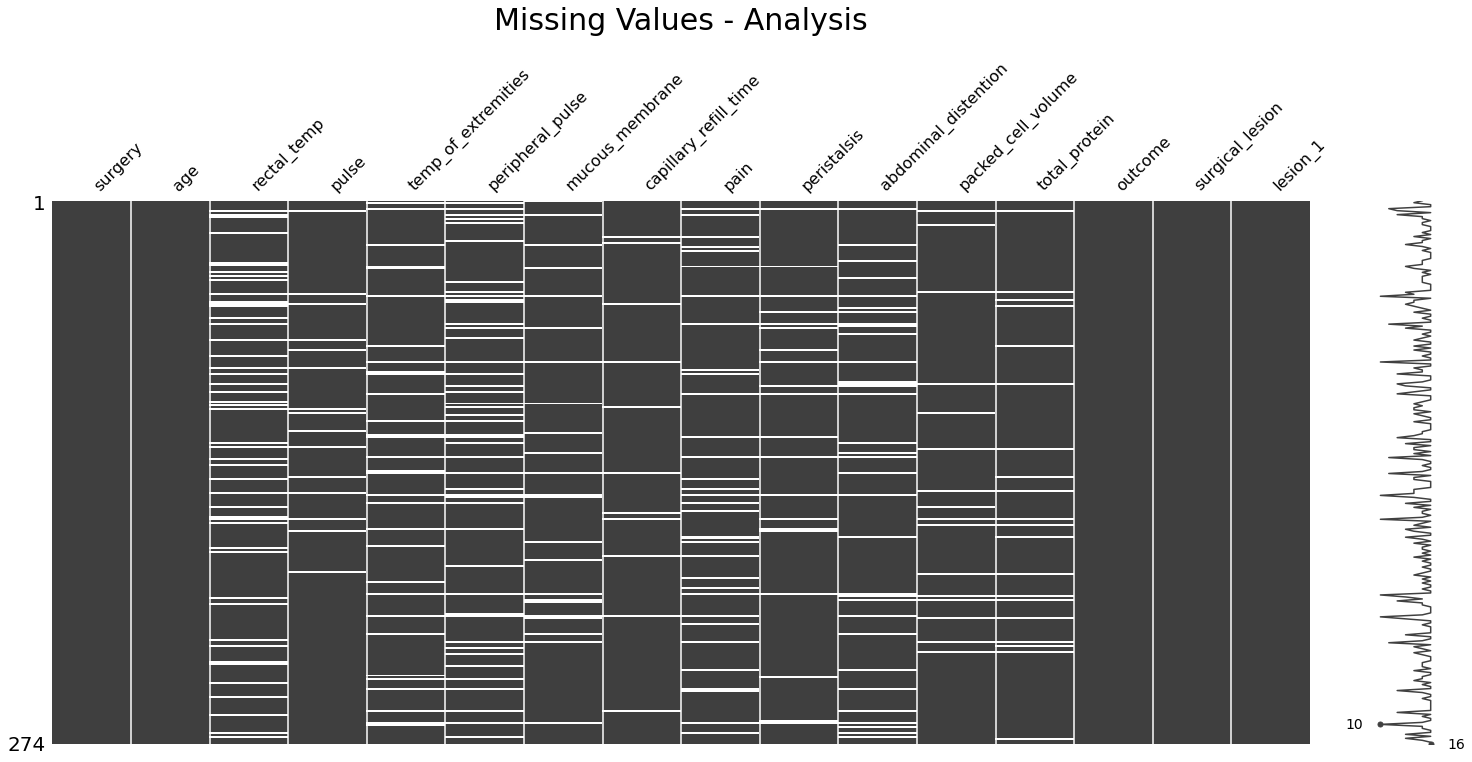

In [216]:
msno.matrix(train) #- matrix
plt.title('Missing Values - Analysis', size = 30, pad=30)
plt.show()

In [217]:
# Creating a coefficient of variation function
def cv_value(X):
    cv = np.std(X)/np.mean(X)
    return cv    

In [218]:
columns_cv = pd.DataFrame(train,columns=train.columns)
#columns_cv['c.variation'] = np.std(X_train.packed_cell_volume)/np.mean(X_train.packed_cell_volume)
cv_value(columns_cv)

rectal_temp           0.019191
pulse                 0.389802
packed_cell_volume    0.223815
total_protein         1.123355
lesion_1              1.518558
dtype: float64

Althought pulse and packed_cell_volume have a hight coefficient of variation yet, they are not as high as the others. So input the missing values using median of our column could be a solution for missing values. The same technique will be applied on rectal_temp attribute. 

In [219]:
median_pulse = train["pulse"].median()
median_packed = train["packed_cell_volume"].median()
median_rectal = train["rectal_temp"].median()

In [220]:
train["pulse"] = train["pulse"].replace(np.NaN, train["pulse"].median())
train["packed_cell_volume"] = train["packed_cell_volume"].replace(np.NaN, train["packed_cell_volume"].median())
train["rectal_temp"] = train["rectal_temp"].replace(np.NaN, train["rectal_temp"].median())

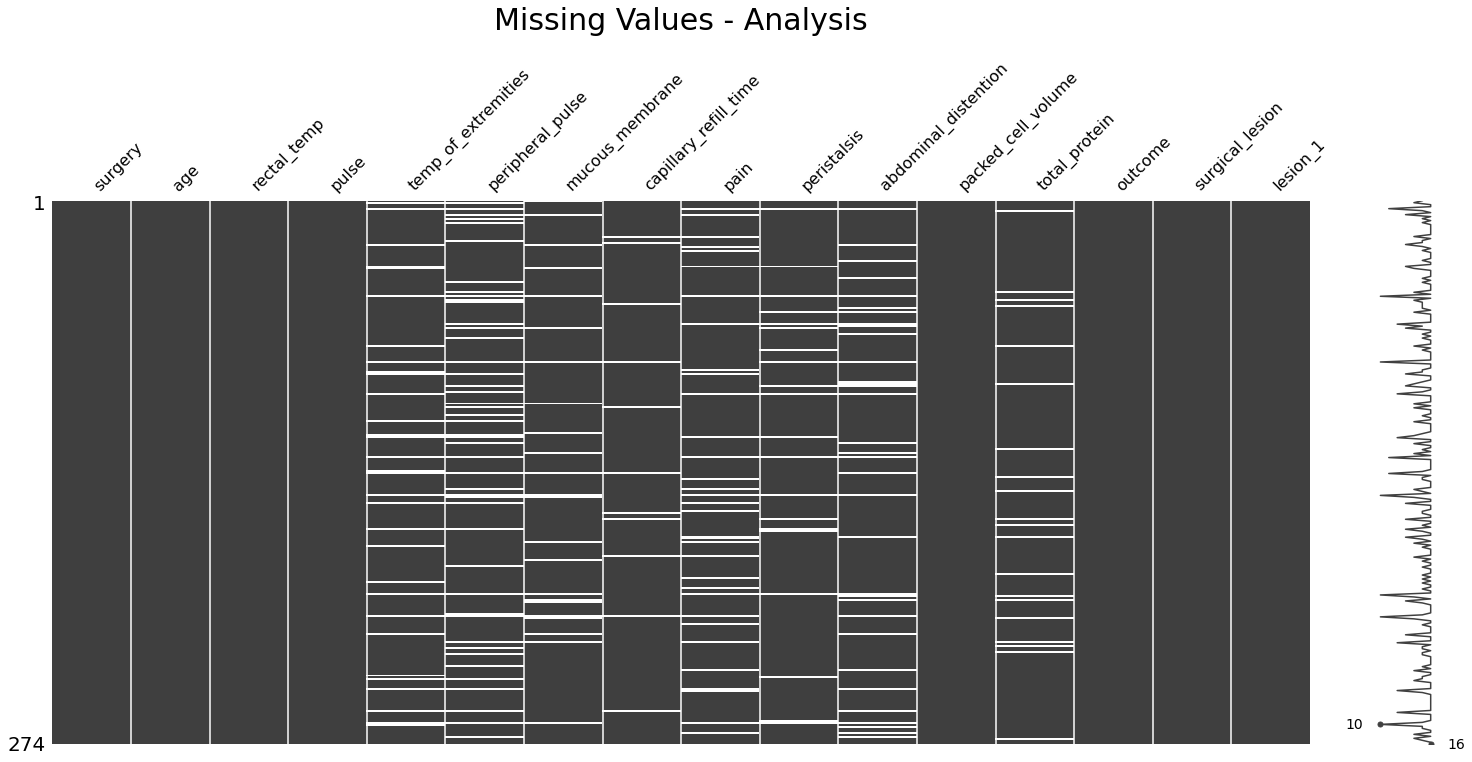

In [221]:
msno.matrix(train) #- matrix
plt.title('Missing Values - Analysis', size = 30, pad=30)
plt.show()

For the rest of the values, that includes categorical variable (we do not transform into numbers yet), we're gonna apply the most frequent value for each column as imputer.

In [222]:
train = train.fillna(train.mode().iloc[0])

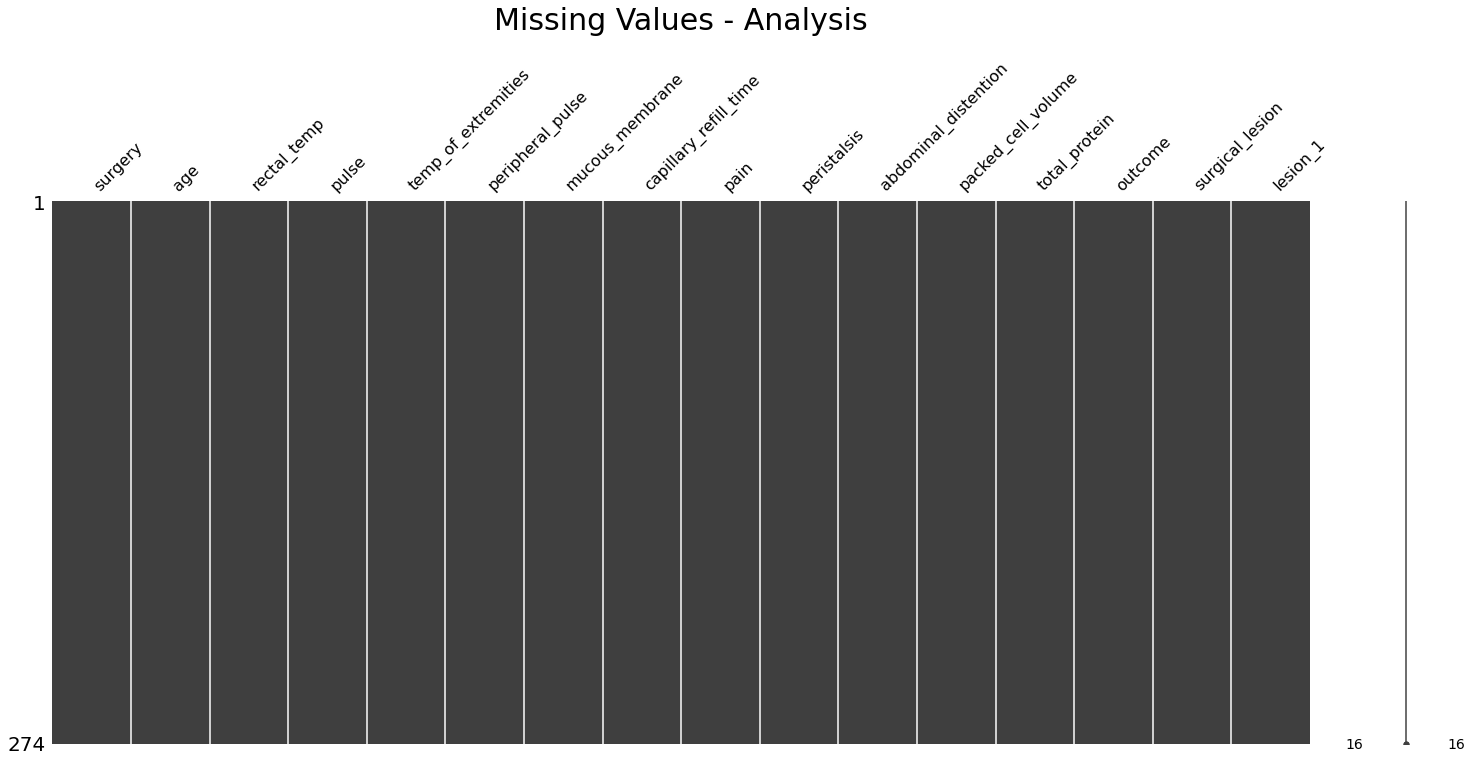

In [223]:
msno.matrix(train) #- matrix
plt.title('Missing Values - Analysis', size = 30, pad=30)
plt.show()

In [224]:
train.describe()

rectal_temp       pulse  packed_cell_volume  total_protein  \
count   274.000000  274.000000          274.000000     274.000000   
mean     38.182117   71.835766           46.543796      23.174088   
std       0.668173   27.511543           10.155111      26.943989   
min      35.400000   36.000000           23.000000       3.300000   
25%      37.900000   48.250000           39.000000       6.500000   
50%      38.200000   64.000000           45.000000       7.300000   
75%      38.500000   88.000000           52.000000      54.750000   
max      40.800000  184.000000           75.000000      89.000000   

           lesion_1  
count    274.000000  
mean    3659.594891  
std     5567.474180  
min        0.000000  
25%     2111.000000  
50%     2673.500000  
75%     3208.500000  
max    41110.000000

#### 4.4 Removing outliers

As observed on dictionary of variables, lesion_1 it's a code. So we don't want to identify any 'possible' outlier. 
<br>
For the other variables, we can do a box-plot to identify and remove outliers. It's an important because it helps on model training performance.

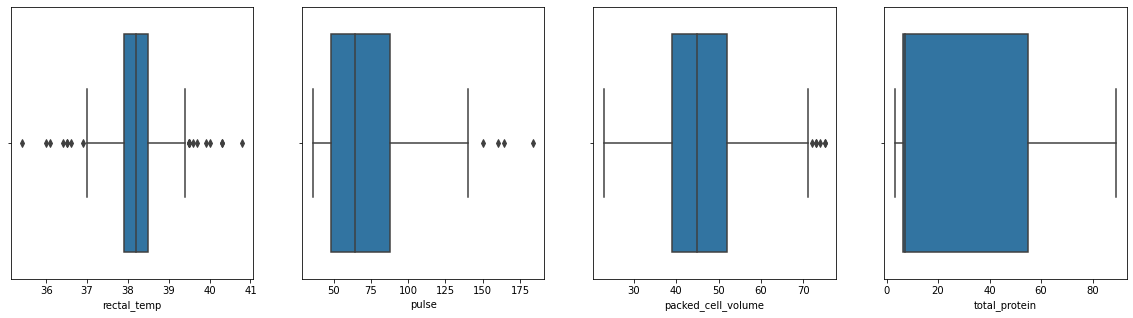

In [225]:
fig, axs = plt.subplots(ncols=4,figsize=(20, 5))  #sns.regplot(x='value', y='wage', data=df_melt, ax=axs[0])
sns.boxplot(x=train['rectal_temp'],ax=axs[0])
sns.boxplot(x=train['pulse'],ax=axs[1])
sns.boxplot(x=train['packed_cell_volume'],ax=axs[2])
sns.boxplot(x=train['total_protein'],ax=axs[3])
plt.show()

As we can see, using box-plot method, there are outliers in rectal_temp, pulse and packed_cell_volume attributes. If we remove all outliers, we are going to deal with a lot of loss information.
<br>
Then, he must to take careful with it. The rectal_temp variable doesn't have a lot of variance. The range seemns to be inside 36 - 41. At the other side, pulse and packed_cell_volume have a lot of variance, some of them identidy as outliers. So let's drop these values and see what happens...

In [226]:
def remove_outlier(dtframe, col_name):   ### function to remove outliers
    q1 = dtframe[col_name].quantile(0.25)
    q3 = dtframe[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    dtframe_out = dtframe.loc[(dtframe[col_name] > fence_low) & (dtframe[col_name] < fence_high)]
    return dtframe_out

Before:

In [227]:
train.shape

(274, 16)

After:

In [228]:
remove_outlier(train,'pulse')

surgery    age  rectal_temp  pulse temp_of_extremities peripheral_pulse  \
0        no  adult         38.5   66.0                cool          reduced   
1       yes  adult         39.2   88.0                cool           normal   
2        no  adult         38.3   40.0              normal           normal   
4        no  adult         37.3  104.0                cool           normal   
5        no  adult         38.2   64.0                warm           normal   
..      ...    ...          ...    ...                 ...              ...   
293      no  adult         38.5   40.0              normal           normal   
294     yes  adult         38.2  120.0                cold           normal   
295      no  adult         37.2   72.0                cool        increased   
296     yes  adult         37.5   72.0                cold          reduced   
297     yes  adult         36.5  100.0                cool          reduced   

    mucous_membrane capillary_refill_time          pain  peristalsis  \
0       normal_pink            more_3_sec  extreme_pain       absent   
1     pale_cyanotic            less_3_sec     mild_pain       absent   
2         pale_pink            less_3_sec     mild_pain   hypomotile   
4     dark_cyanotic            more_3_sec     mild_pain   hypomotile   
5         pale_pink            less_3_sec     depressed   hypomotile   
..              ...                   ...           ...          ...   
293     normal_pink            less_3_sec     depressed  hypermotile   
294   pale_cyanotic            more_3_sec     depressed       absent   
295   pale_cyanotic            more_3_sec   severe_pain   hypomotile   
296   pale_cyanotic            less_3_sec   severe_pain       absent   
297       pale_pink            less_3_sec     mild_pain   hypomotile   

    abdominal_distention  packed_cell_volume  total_protein outcome  \
0                 severe                45.0            8.4    died   
1                 slight                50.0           85.0    died   
2                   none                33.0            6.7   lived   
4                   none                74.0            7.4    died   
5                 slight                45.0            6.5   lived   
..                   ...                 ...            ...     ...   
293                 none                37.0           67.0   lived   
294                 none                55.0           65.0    died   
295             moderate                44.0            6.5    died   
296             moderate                60.0            6.8    died   
297             moderate                50.0            6.0   lived   

    surgical_lesion  lesion_1  
0                no     11300  
1                no      2208  
2                no         0  
4                no      4300  
5                no         0  
..              ...       ...  
293              no         0  
294              no      3205  
295             yes      2208  
296             yes      3205  
297             yes      2208  

[270 rows x 16 columns]

In [229]:
remove_outlier(train,'packed_cell_volume')

surgery    age  rectal_temp  pulse temp_of_extremities peripheral_pulse  \
0        no  adult         38.5   66.0                cool          reduced   
1       yes  adult         39.2   88.0                cool           normal   
2        no  adult         38.3   40.0              normal           normal   
3       yes  young         39.1  164.0                cold           normal   
5        no  adult         38.2   64.0                warm           normal   
..      ...    ...          ...    ...                 ...              ...   
293      no  adult         38.5   40.0              normal           normal   
294     yes  adult         38.2  120.0                cold           normal   
295      no  adult         37.2   72.0                cool        increased   
296     yes  adult         37.5   72.0                cold          reduced   
297     yes  adult         36.5  100.0                cool          reduced   

    mucous_membrane capillary_refill_time          pain  peristalsis  \
0       normal_pink            more_3_sec  extreme_pain       absent   
1     pale_cyanotic            less_3_sec     mild_pain       absent   
2         pale_pink            less_3_sec     mild_pain   hypomotile   
3     dark_cyanotic            more_3_sec     depressed       absent   
5         pale_pink            less_3_sec     depressed   hypomotile   
..              ...                   ...           ...          ...   
293     normal_pink            less_3_sec     depressed  hypermotile   
294   pale_cyanotic            more_3_sec     depressed       absent   
295   pale_cyanotic            more_3_sec   severe_pain   hypomotile   
296   pale_cyanotic            less_3_sec   severe_pain       absent   
297       pale_pink            less_3_sec     mild_pain   hypomotile   

    abdominal_distention  packed_cell_volume  total_protein outcome  \
0                 severe                45.0            8.4    died   
1                 slight                50.0           85.0    died   
2                   none                33.0            6.7   lived   
3                 severe                48.0            7.2    died   
5                 slight                45.0            6.5   lived   
..                   ...                 ...            ...     ...   
293                 none                37.0           67.0   lived   
294                 none                55.0           65.0    died   
295             moderate                44.0            6.5    died   
296             moderate                60.0            6.8    died   
297             moderate                50.0            6.0   lived   

    surgical_lesion  lesion_1  
0                no     11300  
1                no      2208  
2                no         0  
3               yes      2208  
5                no         0  
..              ...       ...  
293              no         0  
294              no      3205  
295             yes      2208  
296             yes      3205  
297             yes      2208  

[268 rows x 16 columns]

In [230]:
train = remove_outlier(train,'pulse')

In [231]:
train = remove_outlier(train,'packed_cell_volume')

In [232]:
train.shape

(264, 16)

We have lost 10 rows doing this. It's not a lot of loss and we gain further in model performance. It seems ok...

#### 4.5 Data Standardization

It's important to  standardize these attributes. For models, there are gains in performance.

In [233]:
cols = "rectal_temp,pulse,packed_cell_volume,total_protein,lesion_1".split(",") # transform one large str into a list
cols 

['rectal_temp', 'pulse', 'packed_cell_volume', 'total_protein', 'lesion_1']

In [234]:
train[cols]

rectal_temp  pulse  packed_cell_volume  total_protein  lesion_1
0           38.5   66.0                45.0            8.4     11300
1           39.2   88.0                50.0           85.0      2208
2           38.3   40.0                33.0            6.7         0
5           38.2   64.0                45.0            6.5         0
6           37.9   48.0                37.0            7.0      3124
..           ...    ...                 ...            ...       ...
293         38.5   40.0                37.0           67.0         0
294         38.2  120.0                55.0           65.0      3205
295         37.2   72.0                44.0            6.5      2208
296         37.5   72.0                60.0            6.8      3205
297         36.5  100.0                50.0            6.0      2208

[264 rows x 5 columns]

In [235]:
from sklearn import preprocessing
sca = preprocessing.StandardScaler()
train[cols] = sca.fit_transform(train[cols])

In [236]:
train.shape

(264, 16)

In [237]:
x_train = train.loc[:,train.columns != "outcome"] #input
y_train = train.outcome

#### 4.6 One-hot encoding

Now we've treated the missing values, it's time to deal with categorical variables. We can't apply these kind of attribute without number transformation. It's really important we have a numerical vector for our machine learning models.

We could just use factorize() or one kind of label encoder. However, one kind of problem on that representation is variables that number could representation, for examplo, order importance. At the same time, closer numbers can be seen as more similar when comparared with the furthest ones.

So, we are going to apply **One-Hot Encoding** technique.

In [238]:
import pandas as pd
import numpy as np# creating initial dataframe
#bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
#bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])# generate binary values using get_dummies
x_train = pd.get_dummies(x_train)# merge with main df bridge_df on key values
#teste = bridge_df.join(dum_df)
#bridge_df
x_train


rectal_temp     pulse  packed_cell_volume  total_protein  lesion_1  \
0       0.495327 -0.160519           -0.105454      -0.560569  1.357707   
1       1.559705  0.711598            0.425841       2.277913 -0.252633   
2       0.191219 -1.191202           -1.380563      -0.623564 -0.643706   
5       0.039165 -0.239802           -0.105454      -0.630975 -0.643706   
6      -0.416996 -0.874069           -0.955526      -0.612447 -0.090395   
..           ...       ...                 ...            ...       ...   
293     0.495327 -1.191202           -0.955526       1.610907 -0.643706   
294     0.039165  1.980132            0.957136       1.536795 -0.076049   
295    -1.481374  0.077331           -0.211713      -0.630975 -0.252633   
296    -1.025212  0.077331            1.488432      -0.619858 -0.076049   
297    -2.545752  1.187298            0.425841      -0.649503 -0.252633   

     surgery_no  surgery_yes  age_adult  age_young  temp_of_extremities_cold  \
0             1            0          1          0                         0   
1             0            1          1          0                         0   
2             1            0          1          0                         0   
5             1            0          1          0                         0   
6             0            1          1          0                         0   
..          ...          ...        ...        ...                       ...   
293           1            0          1          0                         0   
294           0            1          1          0                         1   
295           1            0          1          0                         0   
296           0            1          1          0                         1   
297           0            1          1          0                         0   

     ...  peristalsis_absent  peristalsis_hypermotile  peristalsis_hypomotile  \
0    ...                   1                        0                       0   
1    ...                   1                        0                       0   
2    ...                   0                        0                       1   
5    ...                   0                        0                       1   
6    ...                   0                        0                       1   
..   ...                 ...                      ...                     ...   
293  ...                   0                        1                       0   
294  ...                   1                        0                       0   
295  ...                   0                        0                       1   
296  ...                   1                        0                       0   
297  ...                   0                        0                       1   

     peristalsis_normal  abdominal_distention_moderate  \
0                     0                              0   
1                     0                              0   
2                     0                              0   
5                     0                              0   
6                     0                              1   
..                  ...                            ...   
293                   0                              0   
294                   0                              0   
295                   0                              1   
296                   0                              1   
297                   0                              1   

     abdominal_distention_none  abdominal_distention_severe  \
0                            0                            1   
1                            0                            0   
2                            1                            0   
5                            0                            0   
6                            0                            0   
..                         ...                          ...   
293                          1  

In [239]:
x_train.info() #confirming 5 float objects

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 297
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rectal_temp                       264 non-null    float64
 1   pulse                             264 non-null    float64
 2   packed_cell_volume                264 non-null    float64
 3   total_protein                     264 non-null    float64
 4   lesion_1                          264 non-null    float64
 5   surgery_no                        264 non-null    uint8  
 6   surgery_yes                       264 non-null    uint8  
 7   age_adult                         264 non-null    uint8  
 8   age_young                         264 non-null    uint8  
 9   temp_of_extremities_cold          264 non-null    uint8  
 10  temp_of_extremities_cool          264 non-null    uint8  
 11  temp_of_extremities_normal        264 non-null    uint8  
 12  temp_of_

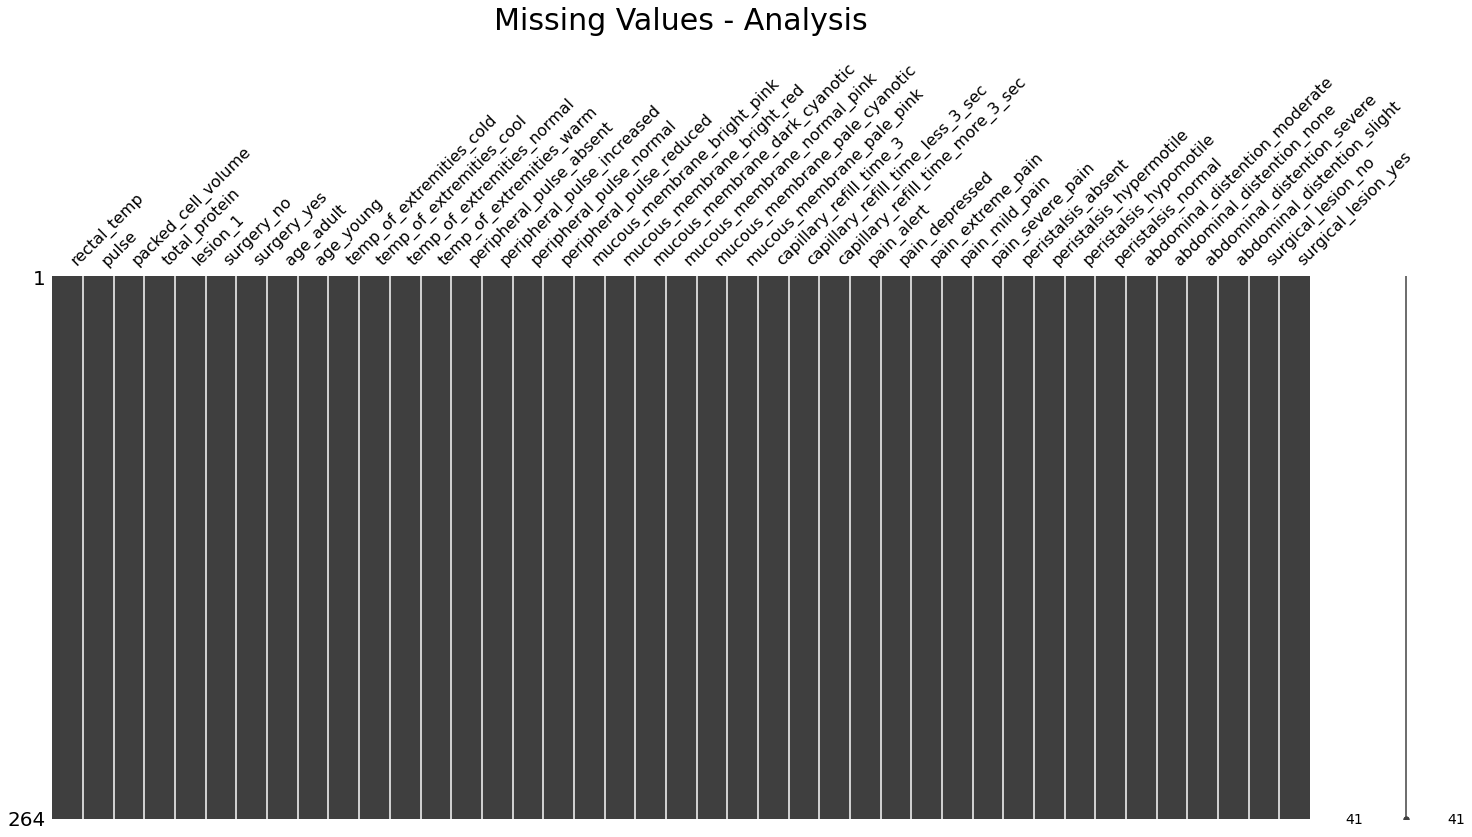

In [240]:
msno.matrix(x_train) #- matrix
plt.title('Missing Values - Analysis', size = 30, pad=30)
plt.show()

#### 4.6 Treatment on Test data

Now we have to do some treatments on test dataset. We have to: 
<br>
1. Treat outcome label "died" = "euthanazied"
2. Select the same columns of train dataset
3. We have to fill missing values with median and mode of train dataset (avoid leakage information).
4. Data standardization
5. One-hot encoding

#### 4.6.1 Outcome Label

In [241]:
test #checking dataset

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
299      no  adult                1         37.3  104.0              35.0   
300      no  adult                2         39.1   72.0              52.0   
301     yes  adult                3         37.2   42.0              12.0   
302      no  young                4         38.0   92.0              28.0   
303     yes  adult                5         37.6   64.0              21.0   
..      ...    ...              ...          ...    ...               ...   
383     yes  adult               85          NaN    NaN               NaN   
384      no  adult               86         38.6   45.0              16.0   
385     yes  adult               87         38.9   80.0              44.0   
386     yes  adult               88         37.0   66.0              20.0   
387     yes  adult               89         36.5  100.0              24.0   

    temp_of_extremities peripheral_pulse mucous_membrane  \
299                 NaN              NaN   dark_cyanotic   
300                warm              NaN     bright_pink   
301                warm           normal     normal_pink   
302              normal           normal     bright_pink   
303              normal           normal     bright_pink   
..                  ...              ...             ...   
383                 NaN              NaN             NaN   
384                warm           normal     bright_pink   
385                cool          reduced       pale_pink   
386              normal          reduced     bright_pink   
387                cool          reduced       pale_pink   

    capillary_refill_time  ... packed_cell_volume total_protein  \
299            more_3_sec  ...               74.0           7.4   
300            less_3_sec  ...               50.0           7.8   
301            less_3_sec  ...                NaN           7.0   
302            less_3_sec  ...               37.0           6.1   
303            less_3_sec  ...               40.0           7.0   
..                    ...  ...                ...           ...   
383                   NaN  ...                NaN           NaN   
384            less_3_sec  ...               43.0          58.0   
385            less_3_sec  ...               54.0           6.5   
386            less_3_sec  ...               35.0           6.9   
387            less_3_sec  ...               50.0           6.0   

    abdomo_appearance abdomo_protein outcome  surgical_lesion lesion_1  \
299               NaN            NaN    died               no     4300   
300               NaN            NaN   lived              yes     2111   
301               NaN            NaN   lived               no     4124   
302             clear            NaN    died               no        0   
303             clear            NaN   lived              yes     4205   
..                ...            ...     ...              ...      ...   
383               NaN            NaN   lived              yes     2124   
384               NaN            NaN   lived               no        0   
385     serosanguious            NaN    died              yes     7111   
386            cloudy            NaN    died              yes    31110   
387     serosanguious            3.4   lived              yes     2208   

    lesion_2  lesion_3  cp_data  
299        0         0       no  
300        0         0       no  
301        0         0       no  
302        0         0      yes  
303        0         0      yes  
..       ...       ...      ...  
383        0         0       no  
384        0         0       no  
385        0         0       no  
386        0         0       no  
387        0         0      yes  

[89 rows x 28 columns]

In [242]:
outcome_list = pd.DataFrame()
#outcome_list['antes'] = data.outcome.value_counts(dropna = False)
outcome_list['antes'] = test.outcome.value_counts(dropna = False,normalize=True) 
outcome_list
#data.drop_duplicates(subset='outcome') #keep="last" mantain index - we could use this to verify

antes
lived       0.595506
died        0.258427
euthanized  0.146067

Notice that when we replace/transform 'died' and 'euthanized' into one ('died'), we gain in our model's robustness. These  two classes of output allows a balanced outcome results.

In [243]:
test.loc[test.outcome == "euthanized", "outcome"] = "died"

C:\Users\marco\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [244]:
outcome_list['depois'] = test.outcome.value_counts(dropna = False, normalize=True)
outcome_list

antes    depois
lived       0.595506  0.595506
died        0.258427  0.404494
euthanized  0.146067       NaN

#### 4.6.2 Columns Analysis

In [245]:
test = test.drop(columns = ['cp_data'])

In [246]:
test.shape

(89, 27)

In [247]:
test = test.drop(columns = ['hospital_number','respiratory_rate','lesion_2','lesion_3'])

In [248]:
test.shape

(89, 23)

#### 4.6.3 Missing Values

In [249]:
#missing_value_data.loc[percent_missing > 30].index.values
#missing_value_data.loc[percent_missing > 30].index.

In [250]:
test = test.drop(columns = filter_data)

In [251]:
test.shape

(89, 16)

In [252]:
test["pulse"] = test["pulse"].replace(np.NaN, median_pulse)
test["packed_cell_volume"] = test["packed_cell_volume"].replace(np.NaN, median_packed)
test["rectal_temp"] = test["rectal_temp"].replace(np.NaN, median_rectal)

In [253]:
test = test.fillna(train.mode().iloc[0]) ###we have to input the train mode to avoid data leakage

#### 4.6.4 Data standardization

In [254]:
from sklearn import preprocessing
sca = preprocessing.StandardScaler()
test[cols] = sca.fit_transform(test[cols])

In [255]:
x_test = test.loc[:,test.columns != "outcome"] #input
y_test = test.outcome

#### 4.6.5 One-Hot Encoding

In [256]:
import pandas as pd
import numpy as np# creating initial dataframe
#bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
#bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])# generate binary values using get_dummies
x_test = pd.get_dummies(x_test)# merge with main df bridge_df on key values
#teste = bridge_df.join(dum_df)
#bridge_df
x_test

rectal_temp     pulse  packed_cell_volume  total_protein  lesion_1  \
299    -1.209316  0.989150            3.239370      -0.497187 -0.040068   
300     1.264917 -0.072704            0.504471      -0.481750 -0.350631   
301    -1.346773 -1.068192           -0.065300      -0.512624 -0.065038   
302    -0.247114  0.590954           -0.976933      -0.547357 -0.650129   
303    -0.796944 -0.338168           -0.635070      -0.512624 -0.053546   
..           ...       ...                 ...            ...       ...   
383     0.027800 -0.338168           -0.065300      -0.807122 -0.348787   
384     0.577630 -0.968643           -0.293208       1.455588 -0.650129   
385     0.990002  0.192759            0.960288      -0.531920  0.358742   
386    -1.621688 -0.271802           -1.204841      -0.516483  3.763594   
387    -2.308975  0.856418            0.504471      -0.551217 -0.336870   

     surgery_no  surgery_yes  age_adult  age_young  temp_of_extremities_cold  \
299           1            0          1          0                         0   
300           1            0          1          0                         0   
301           0            1          1          0                         0   
302           1            0          0          1                         0   
303           0            1          1          0                         0   
..          ...          ...        ...        ...                       ...   
383           0            1          1          0                         0   
384           1            0          1          0                         0   
385           0            1          1          0                         0   
386           0            1          1          0                         0   
387           0            1          1          0                         0   

     ...  peristalsis_absent  peristalsis_hypermotile  peristalsis_hypomotile  \
299  ...                   0                        0                       1   
300  ...                   0                        1                       0   
301  ...                   0                        0                       1   
302  ...                   0                        0                       1   
303  ...                   0                        0                       1   
..   ...                 ...                      ...                     ...   
383  ...                   0                        0                       1   
384  ...                   0                        1                       0   
385  ...                   0                        0                       1   
386  ...                   0                        0                       1   
387  ...                   0                        0                       1   

     peristalsis_normal  abdominal_distention_moderate  \
299                   0                              0   
300                   0                              0   
301                   0                              1   
302                   0                              0   
303                   0                              0   
..                  ...                            ...   
383                   0                              0   
384                   0                              0   
385                   0                              1   
386                   0                              1   
387                   0                              1   

     abdominal_distention_none  abdominal_distention_severe  \
299                          1                            0   
300                          0                            0   
301                          0                            0   
302                          0                            0   
303                          1                            0   
..                         ...                          ...   
383                          1  

In [257]:
type(x_test)

pandas.core.frame.DataFrame

In [258]:
np.array(x_test)

array([[-1.20931581,  0.98914963,  3.23937024, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.26491653, -0.07270418,  0.5044711 , ...,  1.        ,
         0.        ,  1.        ],
       [-1.34677316, -1.06819212, -0.06529956, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.99000183,  0.19275928,  0.96028762, ...,  0.        ,
         0.        ,  1.        ],
       [-1.62168786, -0.27180177, -1.20484087, ...,  0.        ,
         0.        ,  1.        ],
       [-2.30897462,  0.85641791,  0.5044711 , ...,  0.        ,
         0.        ,  1.        ]])

 <font color = '#125031' size = 6 face = "black body"> 5. Applying - Models </font>

It's time to apply the model!

#### 5.1 Decision Tree

In [259]:
import random
# same seed for reproduction and comparison of results
seed = 1
random.seed(seed)
np.random.seed(seed)

In [264]:
# training model
from sklearn.tree import DecisionTreeClassifier

def train(x_train, y_train, seed):
  model = DecisionTreeClassifier(min_samples_leaf=8, random_state=seed) # tried 8 min sample leaf...
  model.fit(x_train, y_train);
  return model

model = train(x_train, y_train, seed)

In [265]:
model

DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

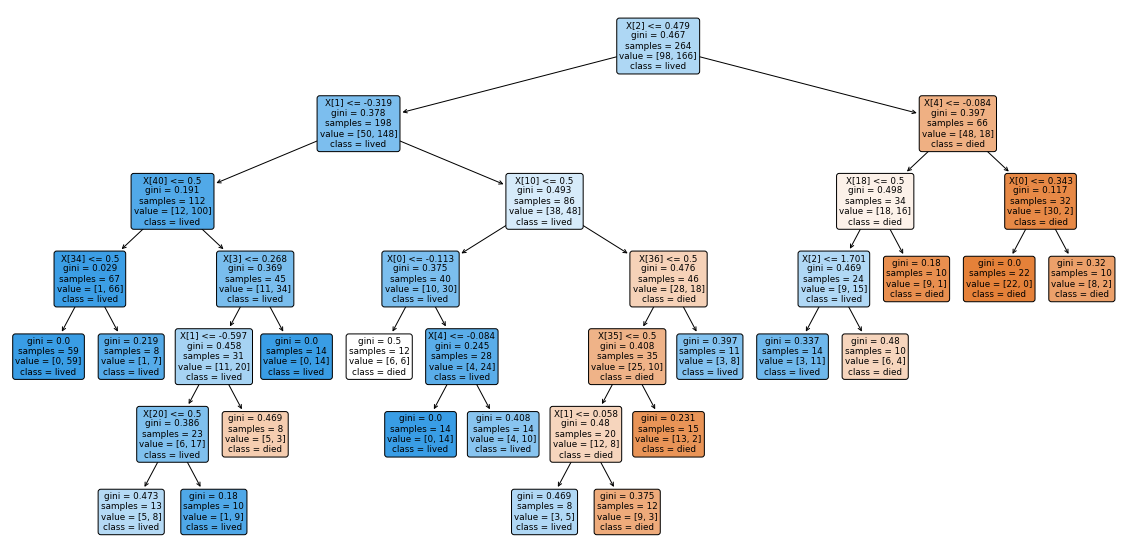

In [266]:
# Tree Plot visualization
from sklearn import tree
fig, ax = plt.subplots(figsize=(20, 10)) 
tree.plot_tree(model, class_names=['died', 'lived'], filled=True, rounded=True); 

Accuracy:  0.7865168539325843
Kappa:  0.5627101111973106
F1:  0.8155339805825242


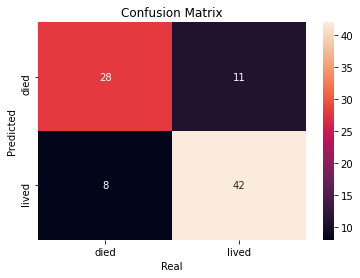

In [267]:
def predict_and_evaluate(x_test, y_test):

  y_pred = model.predict(x_test) #inference

  # Accuracy
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred, pos_label = "lived")
  print('F1: ', f1)

  # Confusion matrix
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Real')
  plt.ylabel('Predicted')
  plt.title('Confusion Matrix')

  # set names
  ax.xaxis.set_ticklabels(['died', 'lived']) 
  ax.yaxis.set_ticklabels(['died', 'lived'])
  plt.show()

predict_and_evaluate(x_test, y_test)

In [268]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score, pos_label="lived")

In [269]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Set the parameters by cross-validation
tuned_parameters = [{'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,7,8,9,10,12],
                     'min_samples_leaf': [1, 2, 3, 4, 5, 8, 10,12]}] # using gridsearch to try different tuned parameters

print("# Tuning hyper-parameters for F1 score")
print()

model = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring=f1_scorer) # instead of 'f1'
model.fit(x_train, y_train)

y_true, y_pred = y_test, model.predict(x_test)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for F1 score

              precision    recall  f1-score   support

        died       0.72      0.81      0.76        36
       lived       0.86      0.79      0.82        53

    accuracy                           0.80        89
   macro avg       0.79      0.80      0.79        89
weighted avg       0.80      0.80      0.80        89




Accuracy:  0.797752808988764
Kappa:  0.5875386199794026
F1:  0.8235294117647058


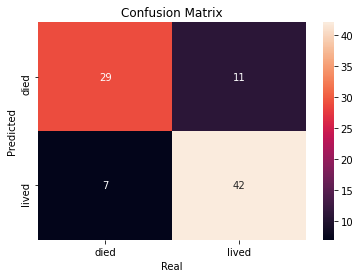

In [270]:
predict_and_evaluate(x_test, y_test)

In [106]:
model.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10}

In [107]:
grid_col = x_train
grid_col

rectal_temp     pulse  packed_cell_volume  total_protein  lesion_1  \
0       0.495327 -0.160519           -0.105454      -0.560569  1.357707   
1       1.559705  0.711598            0.425841       2.277913 -0.252633   
2       0.191219 -1.191202           -1.380563      -0.623564 -0.643706   
5       0.039165 -0.239802           -0.105454      -0.630975 -0.643706   
6      -0.416996 -0.874069           -0.955526      -0.612447 -0.090395   
..           ...       ...                 ...            ...       ...   
293     0.495327 -1.191202           -0.955526       1.610907 -0.643706   
294     0.039165  1.980132            0.957136       1.536795 -0.076049   
295    -1.481374  0.077331           -0.211713      -0.630975 -0.252633   
296    -1.025212  0.077331            1.488432      -0.619858 -0.076049   
297    -2.545752  1.187298            0.425841      -0.649503 -0.252633   

     surgery_no  surgery_yes  age_adult  age_young  temp_of_extremities_cold  \
0             1            0          1          0                         0   
1             0            1          1          0                         0   
2             1            0          1          0                         0   
5             1            0          1          0                         0   
6             0            1          1          0                         0   
..          ...          ...        ...        ...                       ...   
293           1            0          1          0                         0   
294           0            1          1          0                         1   
295           1            0          1          0                         0   
296           0            1          1          0                         1   
297           0            1          1          0                         0   

     ...  peristalsis_absent  peristalsis_hypermotile  peristalsis_hypomotile  \
0    ...                   1                        0                       0   
1    ...                   1                        0                       0   
2    ...                   0                        0                       1   
5    ...                   0                        0                       1   
6    ...                   0                        0                       1   
..   ...                 ...                      ...                     ...   
293  ...                   0                        1                       0   
294  ...                   1                        0                       0   
295  ...                   0                        0                       1   
296  ...                   1                        0                       0   
297  ...                   0                        0                       1   

     peristalsis_normal  abdominal_distention_moderate  \
0                     0                              0   
1                     0                              0   
2                     0                              0   
5                     0                              0   
6                     0                              1   
..                  ...                            ...   
293                   0                              0   
294                   0                              0   
295                   0                              1   
296                   0                              1   
297                   0                              1   

     abdominal_distention_none  abdominal_distention_severe  \
0                            0                            1   
1                            0                            0   
2                            1                            0   
5                            0                            0   
6                            0                            0   
..                         ...                          ...   
293                          1  

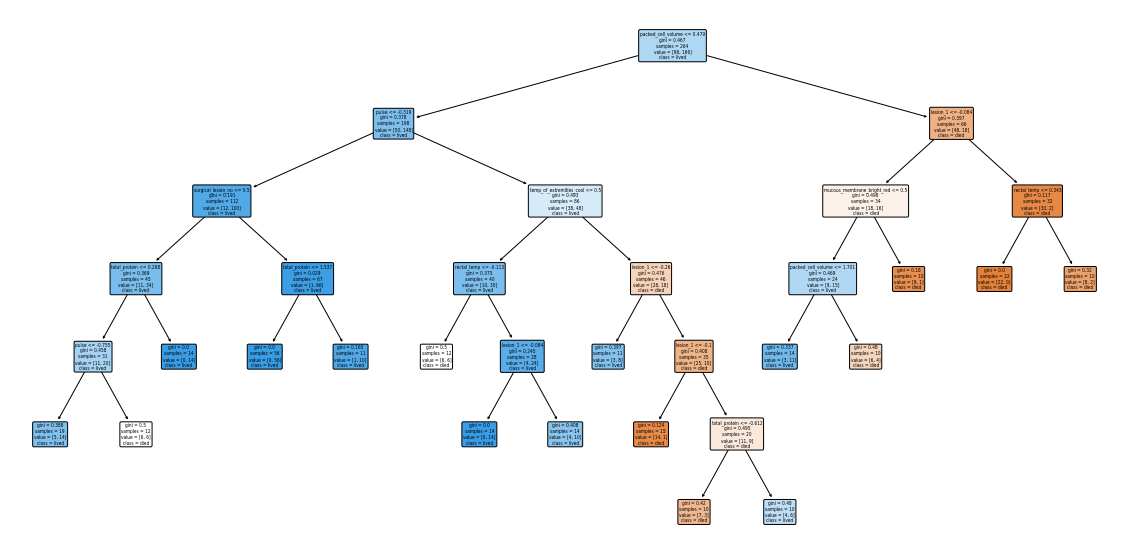

In [108]:
fig, ax = plt.subplots(figsize=(20, 10)) 
tree.plot_tree(model.best_estimator_, class_names=['died', 'lived'], 
               filled=True, rounded=True, feature_names=grid_col.columns);

#### 5.2 KNN

In [271]:
# training model
from sklearn.neighbors import KNeighborsClassifier

def train(x_train, y_train, n_neighbors=3):
  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  model.fit(x_train, y_train);
  y_pred = model.predict(x_test) # inference

  return model, y_pred

model, y_pred = train(x_train, y_train)

Accuracy:  0.8202247191011236
Kappa:  0.6130434782608696
F1:  0.8152966686378869


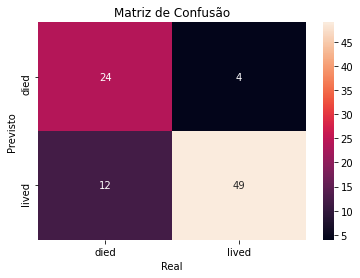

In [272]:
def evaluate(y_test, y_pred):  

  # Accuracy
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred, average='weighted')
  print('F1: ', f1)

  # confusion matrix
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')

  # ser names
  ax.xaxis.set_ticklabels(['died', 'lived']) 
  ax.yaxis.set_ticklabels(['died', 'lived'])
  plt.show()

evaluate(y_test, y_pred)

In [273]:
# Precision
#precision_scorer = make_scorer(f1_score,greater_is_better={'average' : 'weighted'} , pos_label='lived')
#precision_scorer = make_scorer(f1_score, pos_label='lived')
#precision_scorer
precision_scorer = make_scorer(f1_score, average='weighted') #f1_score, average='weighted', pos_label='lived')Note that pos_label (set to 'lived') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label]

In [274]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# parameters to be tested
tuned_parameters = [{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10,11,12]}]

print("# Tuning hyper-parâmetros parar F1 score")
print()

model = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring=precision_scorer) # or 'f1_weighted' instead of precision_scorer
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print()

# Tuning hyper-parâmetros parar F1 score

              precision    recall  f1-score   support

        died       0.76      0.61      0.68        36
       lived       0.77      0.87      0.81        53

    accuracy                           0.76        89
   macro avg       0.76      0.74      0.75        89
weighted avg       0.76      0.76      0.76        89




Accuracy:  0.7640449438202247
Kappa:  0.49445496348390583
F1:  0.7586480140124369


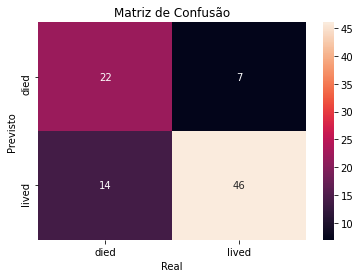

In [275]:
evaluate(y_test, y_pred)

In [276]:
model.best_params_

{'n_neighbors': 10}

We can use probabilities generated from the model to be more careful with some results. 

In [277]:
probabilities = model.predict_proba(x_test)
probabilities

array([[0.8, 0.2],
       [0.1, 0.9],
       [0.1, 0.9],
       [0.1, 0.9],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.2, 0.8],
       [0.3, 0.7],
       [0.7, 0.3],
       [0.9, 0.1],
       [0.5, 0.5],
       [0.2, 0.8],
       [0.8, 0.2],
       [0. , 1. ],
       [0.4, 0.6],
       [0.5, 0.5],
       [0.8, 0.2],
       [0.3, 0.7],
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0.7, 0.3],
       [0.7, 0.3],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.2, 0.8],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.4, 0.6],
       [0.9, 0.1],
       [0.2, 0.8],
       [0.4, 0.6],
       [0. , 1. ],
       [0.1, 0.9],
       [0.7, 0.3],
       [0. , 1. ],
       [0. , 1. ],
       [0.1, 0.9],
       [0.3, 0.7],
       [0. , 1. ],
       [0.1, 0.9],
       [0. , 1. ],
       [0.1, 0.9],
       [0. , 1. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.2,

In [278]:
y_pred = []
for prediction in probabilities:
  if prediction[0] <0.4:
    y_pred.append('lived')
  else:
    y_pred.append('died')

Accuracy:  0.797752808988764
Kappa:  0.5801886792452831
F1:  0.797752808988764


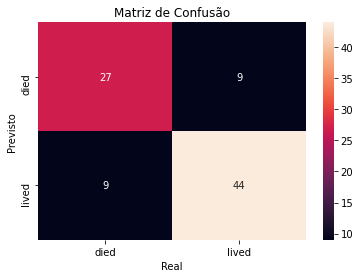

In [279]:
evaluate(y_test, y_pred)

#### 5.3 SVM

In [280]:
import random
# Seed for results reproduction
seed = 1
random.seed(seed)
np.random.seed(seed)

In [281]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(264, 41)
(89, 41)
(264,)
(89,)


In [282]:
# training model
from sklearn.svm import SVC

def trainSVM(x_train, y_train, seed):
  model = SVC(random_state=seed)
  model.fit(x_train, y_train)
  return model

model = trainSVM(x_train, y_train, seed)

Accuracy:  0.8539325842696629
Kappa:  0.6898954703832753
F1:  0.8828828828828829


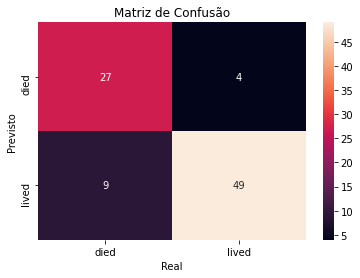

In [283]:
def predict_and_evaluate(x_test, y_test):

  y_pred = model.predict(x_test) #inference

  # Accuracy
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred, pos_label="lived") #pos_label="lived" included
  print('F1: ', f1)

  # confusion matrix
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')

  # set names
  ax.xaxis.set_ticklabels(['died', 'lived']) 
  ax.yaxis.set_ticklabels(['died', 'lived'])
  plt.show()

predict_and_evaluate(x_test, y_test)

In [284]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score, pos_label="lived")

In [285]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4,1e-5],
                     'C': [1, 10, 100, 1000]}]
                     
print("# Tuning hyper-parameters for F1 score")
print()

model = GridSearchCV(SVC(), tuned_parameters, scoring=f1_scorer) #instead of 'f1'
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print()

# Tuning hyper-parameters for F1 score

              precision    recall  f1-score   support

        died       0.81      0.58      0.68        36
       lived       0.76      0.91      0.83        53

    accuracy                           0.78        89
   macro avg       0.78      0.74      0.75        89
weighted avg       0.78      0.78      0.77        89




Accuracy:  0.7752808988764045
Kappa:  0.5117937465715854
F1:  0.8275862068965516


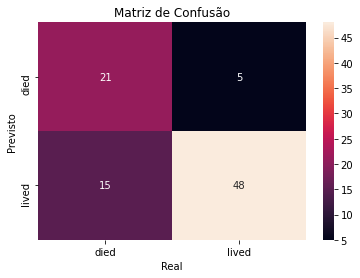

In [286]:
predict_and_evaluate(x_test, y_test)

In [287]:
model.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

#### PCA - Technique for dimensionality reduction


In [288]:
from sklearn.decomposition import PCA
pca = PCA().fit(x_train)
df = pd.DataFrame(pca.explained_variance_ratio_.cumsum())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

           0
0   0.209343
1   0.326688
2   0.426987
3   0.514967
4   0.573035
5   0.626551
6   0.667394
7   0.706510
8   0.736516
9   0.764555
10  0.791350
11  0.816197
12  0.835263
13  0.853325
14  0.870077
15  0.885969
16  0.900822
17  0.914159
18  0.927148
19  0.939776
20  0.949681
21  0.958561
22  0.966013
23  0.972964
24  0.979220
25  0.984546
26  0.989597
27  0.993746
28  0.997407
29  0.999068
30  1.000000
31  1.000000
32  1.000000
33  1.000000
34  1.000000
35  1.000000
36  1.000000
37  1.000000
38  1.000000
39  1.000000
40  1.000000


In [289]:
# 214
cut = 33
x_train_pca = pca.transform(x_train)
x_train_pca = x_train_pca[:, 0:cut]
x_train_pca.shape

(264, 33)

In [290]:
x_test_pca = pca.transform(x_test)
x_test_pca = x_test_pca[:, 0:cut]
x_test_pca.shape

(89, 33)

In [291]:
# training SVM model
model = trainSVM(x_train_pca, y_train, seed)


Accuracy:  0.8651685393258427
Kappa:  0.7124394184168013
F1:  0.8928571428571428


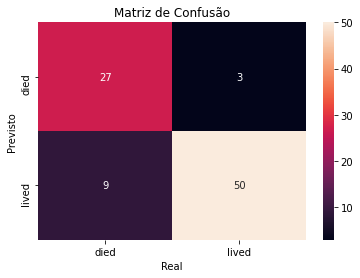

In [292]:
def predict_and_evaluate2(x_test_pca, y_test):

  y_pred = model.predict(x_test_pca) #inference

  # Accuracy
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # confusion matrix
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')

  # set names
  ax.xaxis.set_ticklabels(['died', 'lived']) 
  ax.yaxis.set_ticklabels(['died', 'lived'])
  plt.show()

predict_and_evaluate(x_test_pca, y_test)

Accuracy:  0.8651685393258427
Kappa:  0.7124394184168013
F1:  0.8928571428571428


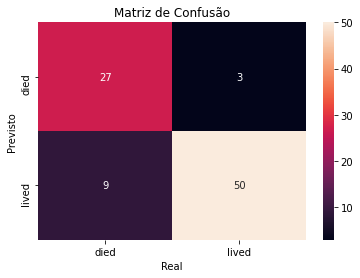

In [293]:
predict_and_evaluate(x_test_pca, y_test)

#### 5.4 Random Forest

In [296]:
# training model
from sklearn.ensemble import RandomForestClassifier

def train(x_train, y_train, seed):
  model = RandomForestClassifier(min_samples_leaf=3, random_state=seed) 
  model.fit(x_train, y_train);
  return model

model = train(x_train, y_train, seed)

Accuracy:  0.8764044943820225
Kappa:  0.7302287131441167
F1:  0.905982905982906


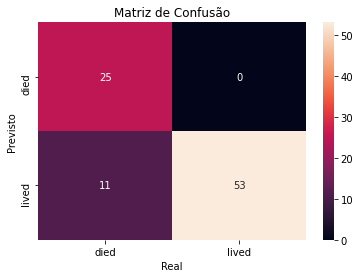

In [297]:
def predict_and_evaluate(x_test, y_test, model):

  y_pred = model.predict(x_test) #inference

  # Accuracy
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred, pos_label="lived")
  print('F1: ', f1)

  # confusion matrix
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')

  # set names
  ax.xaxis.set_ticklabels(['died', 'lived']) 
  ax.yaxis.set_ticklabels(['died', 'lived'])
  plt.show()

predict_and_evaluate(x_test, y_test, model)

In [298]:
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score, pos_label="lived")

In [299]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [20, 50, 100, 150, 200, 300, 400, 500],
                     'max_features': [3,4,8,9,10,11]}]

print("# Tuning hyper-parameters for F1 score")
print()

model = GridSearchCV(RandomForestClassifier(n_jobs=50, verbose=1), tuned_parameters, scoring=f1_scorer)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_pred, y_pred))
print()

# Tuning hyper-parameters for F1 score



[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   5 out of  20 | elapsed:   10.8s remaining:   32.7s
[Parallel(n_jobs=50)]: Done  20 out of  20 | elapsed:   14.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   5 out of  20 | elapsed:    6.6s remaining:   20.1s
[Parallel(n_jobs=50)]: Done  20 out of  20 | elapsed:    9.7s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent worker

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      |

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   5 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=50)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   5 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=50)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent w

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.3s
[Parallel(n_jobs=50)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.3s
[Parallel(n_jobs=50)]: Done 300 out of 300 | elapsed:    0.5s finished
[P

[Parallel(n_jobs=50)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   5 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=50)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   2 out of  50 | elapsed:    0.0s remaining:    0.9s
[Parallel(n_jobs=50)]: Done  50 out of  50 | elapsed:    0.0s finished
[Pa

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.3s
[Parallel(n_jobs=50)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.3s
[Parallel(n_jobs=50)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.3s
[Parallel(n

[Parallel(n_jobs=50)]: Done   2 out of  50 | elapsed:    0.0s remaining:    0.7s
[Parallel(n_jobs=50)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   2 out of  50 | elapsed:    0.0s remaining:    0.6s
[Parallel(n_jobs=50)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   2 out of  50 | elapsed:    0.0s remaining:    0.8s
[Parallel(n_jobs=50)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   2 out of  50 | elapsed:    0.0s remaining:    0.6s
[Parallel(n_jobs=50)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   2 out of  50 | elapsed:    0.0s remaining:  

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.3s
[Parallel(n_jobs=50)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.3s
[Parallel(n_jobs=50)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.3s
[Parallel(n

[Parallel(n_jobs=50)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   2 out of  50 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=50)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   2 out of  50 | elapsed:    0.0s remaining:    1.0s
[Parallel(n_jobs=50)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   2 out of  50 | elapsed:    0.0s remaining:    0.6s
[Parallel(n_jobs=50)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   2 out of  50 | elapsed:    0.0s remaining:    0.9s
[Parallel(n_jobs=50)]: Done  50 out of  50 | elapsed:    0.1s finished
[Pa

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.4s
[Parallel(n_jobs=50)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.3s
[Parallel(n_jobs=50)]: Done 400 out of 400 | elapsed:    0.7s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 400 out of 400 | elapsed:    0.1s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.3s
[Parallel(n

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   2 out of  50 | elapsed:    0.0s remaining:    0.8s
[Parallel(n_jobs=50)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   2 out of  50 | elapsed:    0.0s remaining:    0.6s
[Parallel(n_jobs=50)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   2 out of  50 | elapsed:    0.0s remaining:    0.8s
[Parallel(n_jobs=50)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   2 out of  50 | elapsed:    0.0s remaining:    0.7s
[Parallel(n_jobs=50)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent worker

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.3s
[Parallel(n_jobs=50)]: Done 400 out of 400 | elapsed:    0.7s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 400 out of 400 | elapsed:    0.1s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.3s
[Parallel(n_jobs=50)]: Done 400 out of 400 | elapsed:    0.7s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 400 out of 400 | elapsed:    0.1s finished
[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.3s
[Parallel(n

              precision    recall  f1-score   support

        died       1.00      1.00      1.00        34
       lived       1.00      1.00      1.00        55

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89




[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   2 out of  50 | elapsed:    0.0s remaining:    0.8s
[Parallel(n_jobs=50)]: Done  50 out of  50 | elapsed:    0.0s finished


[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done   2 out of  50 | elapsed:    0.0s remaining:    0.8s
[Parallel(n_jobs=50)]: Done  50 out of  50 | elapsed:    0.0s finished


Accuracy:  0.9550561797752809
Kappa:  0.9058699101004759
F1:  0.9629629629629629


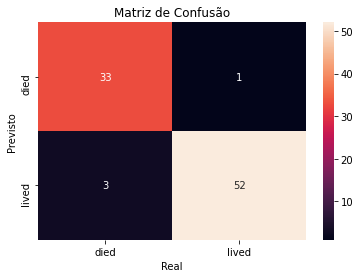

In [300]:
predict_and_evaluate(x_test, y_test, model)

#### 5.5 XGBoost

Using boosting, that uses principles of ensemble models.

In [135]:
#pip install xgboost

In [301]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [302]:
#data_dmatrix = xgb.DMatrix(data=x_train, label=y_train) ...think y_train must be coded (1,0)
xgb_class = xgb.XGBClassifier (random_state=seed)

In [303]:
xgb_class.fit(x_train, y_train, early_stopping_rounds = 10, eval_set=[(x_test,y_test)])

[18:06:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.58336
[1]	validation_0-logloss:0.53187
[2]	validation_0-logloss:0.47831
[3]	validation_0-logloss:0.46342
[4]	validation_0-logloss:0.43217
[5]	validation_0-logloss:0.40930
[6]	validation_0-logloss:0.39250
[7]	validation_0-logloss:0.39645
[8]	validation_0-logloss:0.39073
[9]	validation_0-logloss:0.39497
[10]	validation_0-logloss:0.39105
[11]	validation_0-logloss:0.37907
[12]	validation_0-logloss:0.37589
[13]	validation_0-logloss:0.37204
[14]	validation_0-logloss:0.37375
[15]	validation_0-logloss:0.36668
[16]	validation_0-logloss:0.35509
[17]	validation_0-logloss:0.36011
[18]	validation_0-logloss:0.35338
[19]	validation_0-logloss:0.36336
[20]	validation_0-lo

C:\Users\marco\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[37]	validation_0-logloss:0.33049
[38]	validation_0-logloss:0.32394
[39]	validation_0-logloss:0.32985
[40]	validation_0-logloss:0.33148
[41]	validation_0-logloss:0.33012
[42]	validation_0-logloss:0.33265
[43]	validation_0-logloss:0.33075
[44]	validation_0-logloss:0.33312
[45]	validation_0-logloss:0.33636
[46]	validation_0-logloss:0.33791
[47]	validation_0-logloss:0.33617


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [304]:
xgb_class.score(x_test,y_test)

0.8426966292134831

In [305]:
def train(x_train, y_train, seed):
  model = xgb.XGBClassifier (random_state=seed) # tente mudar parâmetro para evitar overfitting
  model.fit(x_train, y_train, early_stopping_rounds = 10, eval_set=[(x_test,y_test)]);
  return model

model = train(x_train, y_train, seed)

[18:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.58336
[1]	validation_0-logloss:0.53187
[2]	validation_0-logloss:0.47831
[3]	validation_0-logloss:0.46342
[4]	validation_0-logloss:0.43217
[5]	validation_0-logloss:0.40930
[6]	validation_0-logloss:0.39250
[7]	validation_0-logloss:0.39645
[8]	validation_0-logloss:0.39073
[9]	validation_0-logloss:0.39497
[10]	validation_0-logloss:0.39105
[11]	validation_0-logloss:0.37907
[12]	validation_0-logloss:0.37589
[13]	validation_0-logloss:0.37204
[14]	validation_0-logloss:0.37375
[15]	validation_0-logloss:0.36668
[16]	validation_0-logloss:0.35509
[17]	validation_0-logloss:0.36011
[18]	validation_0-logloss:0.35338
[19]	validation_0-logloss:0.36336
[20]	validation_0-lo

Accuracy:  0.8426966292134831
Kappa:  0.6645126548196015
F1:  0.875


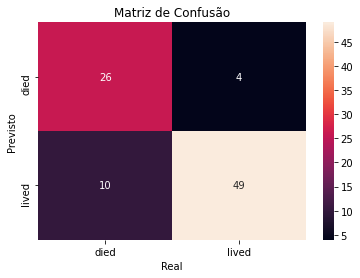

In [306]:
def predict_and_evaluate(x_test, y_test):

  y_pred = model.predict(x_test) # inference

  # Accuracy
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred, pos_label="lived") #pos_label="lived" included
  print('F1: ', f1)

  # Confusion matrix
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')

  # set names
  ax.xaxis.set_ticklabels(['died', 'lived']) 
  ax.yaxis.set_ticklabels(['died', 'lived'])
  plt.show()

predict_and_evaluate(x_test, y_test)

In [142]:
y_test, y_pred

(299     died
 300    lived
 301    lived
 302     died
 303    lived
        ...  
 383    lived
 384    lived
 385     died
 386     died
 387    lived
 Name: outcome, Length: 89, dtype: object,
 array(['died', 'lived', 'lived', 'lived', 'lived', 'lived', 'lived',
        'lived', 'lived', 'died', 'died', 'died', 'died', 'lived', 'lived',
        'died', 'died', 'lived', 'lived', 'lived', 'died', 'died', 'died',
        'lived', 'died', 'lived', 'lived', 'lived', 'lived', 'lived',
        'lived', 'lived', 'lived', 'lived', 'died', 'died', 'lived',
        'lived', 'lived', 'lived', 'died', 'lived', 'lived', 'lived',
        'died', 'lived', 'lived', 'lived', 'lived', 'lived', 'lived',
        'died', 'lived', 'lived', 'died', 'lived', 'lived', 'lived',
        'died', 'died', 'lived', 'lived', 'lived', 'died', 'lived',
        'lived', 'lived', 'died', 'died', 'died', 'lived', 'lived', 'died',
        'died', 'lived', 'died', 'lived', 'lived', 'died', 'lived', 'died',
        'died'

**Calculating RMSE (Root-mean-square deviation):**

In [143]:
cleanup_nums = {"lived":1,"died":0}

In [144]:
y_test = y_test.replace(cleanup_nums)


In [145]:
y_pred = (y_pred=='lived').astype(int)

In [146]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.237023


**Feature importance**

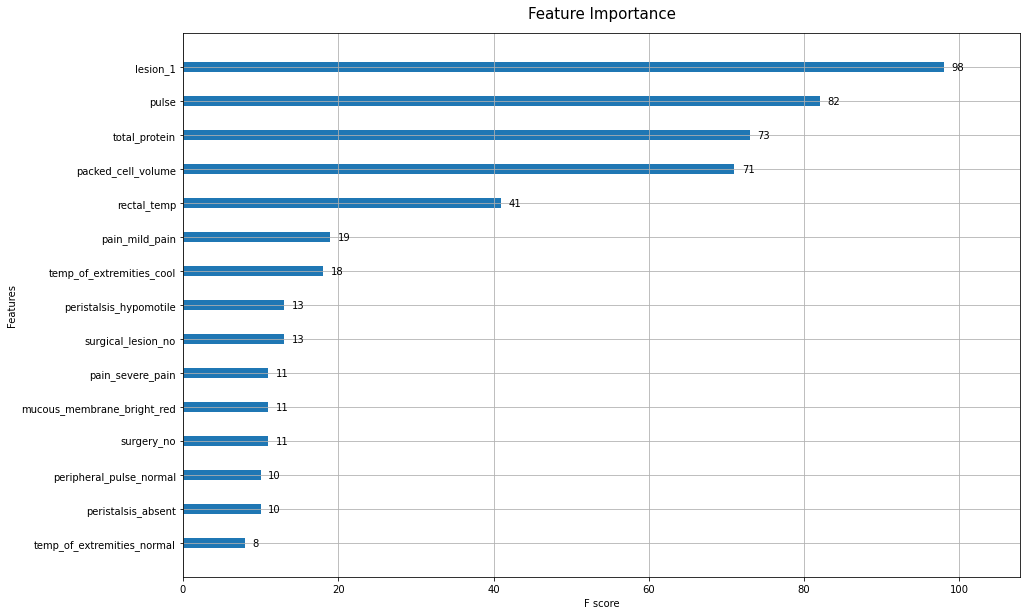

In [147]:
fig, ax = plt.subplots(figsize=(15,10))
xgb.plot_importance(model, ax = ax, max_num_features=15, height = 0.3, show_values = True)
ax.set_ylabel('Features',fontsize = 10)
ax.set_xlabel('F score',fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.set_title('Feature Importance', size=15,pad=15)
plt.show()

#for i, v in enumerate(y):
#    ax.text(v + 3, i, str(y), color='black', size = 28)


In [148]:
#fig, ax = plt.plot(figsize=(40,15))
#xgb.plot_importance(model)
#plt.rcParams['figure.figsize'] = [5, 5]
#plt.show()

**ROC Curve**

In [149]:
from sklearn import metrics
def buildROC(y_test, y_pred):
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.gcf().savefig('roc.png')

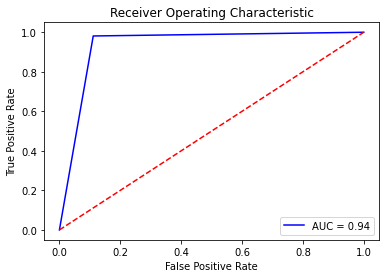

In [150]:
buildROC(y_test, y_pred)